# **Scraping**(Daten Sammlung)

In [ ]:
import requests
import bs4
import pandas as pd
import concurrent.futures

In [ ]:
def scrape_listings(url):
    # Open the URL
    r = requests.get(url)
    if r.status_code != 200:
        print(f"Error loading page: {url}")
        return pd.DataFrame()
    # Parse the HTML
    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    # Find all div-elements with the specified class
    listings = soup.find_all('div', {'class': 'model-common-ad-body grid-y align-justify'})

    # Check if listings are found
    if not listings:
        print(f"No listings found on page: {url}")
        return pd.DataFrame()


In [ ]:
# Iterate over the listings
    rows = []
    for element in listings:
        row = {}

        a_element = element.find('a')
        row['url'] = a_element.get('href') if a_element else None

        title_element = element.find('div', {'class': 'common-property-ad-title'})
        row['title'] = title_element.text.strip() if title_element else None

        price_element = element.find('span', {'class': 'property-ad-price'})
        row['price'] = price_element.text.strip() if price_element else None

        price_per_sqm_element = element.find('span', {'class': 'property-ad-price-per-sqm'})
        row['price_per_sqm'] = price_per_sqm_element.text.strip() if price_per_sqm_element else None

        level_element = element.find('span', {'class': 'property-ad-level'})
        row['level'] = level_element.text.strip() if level_element else None

        bedrooms_container = element.find('div', {'class': 'grid-x property-ad-bedrooms-container'})
        bedrooms_element = bedrooms_container.find('span') if bedrooms_container else None
        row['bedrooms'] = bedrooms_element.text.strip() if bedrooms_element else None

        bathrooms_container = element.find('div', {'class': 'grid-x property-ad-bathrooms-container'})
        bathrooms_element = bathrooms_container.find('span') if bathrooms_container else None
        row['bathrooms'] = bathrooms_element.text.strip() if bathrooms_element else None

        address_element = element.find('span', {'class': 'common-property-ad-address'})
        row['address'] = address_element.text.strip() if address_element else None

        year_container = element.find('div',{'class': 'grid-x property-ad-construction-year-container'})
        year_element = year_container.find('span') if year_container else None
        row['year'] = year_element.text.strip() if year_element else None


        rows.append(row)


    return pd.DataFrame(rows)

In [ ]:
def scrape_all(pages):
    base_url = 'https://www.xe.gr/en/property/results?transaction_name=rent&item_type=re_residence&geo_place_ids[]=ChIJ8UNwBh-9oRQR3Y1mdkU1Nic&page='
    df = pd.DataFrame()

    # Create a function to scrape a single page
    def scrape_page(page):
        data = scrape_listings(base_url + str(page))
        print(f"Page {page} has {len(data)} listings.")
        return data

    # Use concurrent.futures to scrape pages in parallel
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        results = list(executor.map(scrape_page, pages))

    # Concatenate all results into a single DataFrame
    df = pd.concat(results, ignore_index=True)
    return df

In [ ]:
#Using pages 1 to 172 to pull all pages
df_large = scrape_all(range(1, 173))
print(f"Total listings scraped: {len(df_large)}")
print(df_large)

In [ ]:
#To save all the data in CSV file:
#df_large.to_csv('xe_property_listings.csv', index=False)

# **Datenbereinigung - (Duplikate und Fehlende Werte handeln)**

In [ ]:
import pandas as pd

In [ ]:
# Load the CSV file
df_original = pd.read_csv('xe_property_listings.csv')

# Display the first few rows
print(df_original.head())

# Check data types
print(df_original.dtypes)

# Display column names
print(df_original.columns)

# Create a copy of the DataFrame
df_clean = df_original.copy()


                                                 url                title  \
0  https://www.xe.gr/en/property/d/property-to-re...   Apartment 39 sq.m.   
1  https://www.xe.gr/en/property/d/property-to-re...   Apartment 53 sq.m.   
2  https://www.xe.gr/en/property/d/property-to-re...   Apartment 97 sq.m.   
3  https://www.xe.gr/en/property/d/property-to-re...  Apartment 117 sq.m.   
4  https://www.xe.gr/en/property/d/property-to-re...  Apartment 124 sq.m.   

    price price_per_sqm level bedrooms bathrooms  \
0    €480     €12/sq.m.   4th       ×1        ×1   
1    €600     €11/sq.m.   1st       ×2        ×1   
2    €850      €9/sq.m.   2nd       ×4        ×1   
3    €800      €7/sq.m.   1st       ×3        ×1   
4  €2,200     €18/sq.m.   4th       ×3        ×1   

                                  address   year  
0  Athens (Attica Square) | Home for rent  ×2000  
1    Athens (Ano Kipseli) | Home for rent    NaN  
2       Athens (Polygono) | Home for rent  ×1983  
3  Athens (Agios Ioa

In [ ]:
#Check for duplicates and remove them
print(df_clean.duplicated().sum())

df = df_clean.drop_duplicates()

print(df_clean)


0
                                                    url                title  \
0     https://www.xe.gr/en/property/d/property-to-re...   Apartment 39 sq.m.   
1     https://www.xe.gr/en/property/d/property-to-re...   Apartment 53 sq.m.   
2     https://www.xe.gr/en/property/d/property-to-re...   Apartment 97 sq.m.   
3     https://www.xe.gr/en/property/d/property-to-re...  Apartment 117 sq.m.   
4     https://www.xe.gr/en/property/d/property-to-re...  Apartment 124 sq.m.   
...                                                 ...                  ...   
5772  https://www.xe.gr/en/property/d/property-to-re...    Apartment 1 sq.m.   
5773  https://www.xe.gr/en/property/d/property-to-re...  Apartment 102 sq.m.   
5774  https://www.xe.gr/en/property/d/property-to-re...   Apartment 80 sq.m.   
5775  https://www.xe.gr/en/property/d/property-to-re...  Apartment 109 sq.m.   
5776  https://www.xe.gr/en/property/d/property-to-re...  Apartment 163 sq.m.   

       price price_per_sqm          l

In [ ]:
print(df_clean.head())

                                                 url                title  \
0  https://www.xe.gr/en/property/d/property-to-re...   Apartment 39 sq.m.   
1  https://www.xe.gr/en/property/d/property-to-re...   Apartment 53 sq.m.   
2  https://www.xe.gr/en/property/d/property-to-re...   Apartment 97 sq.m.   
3  https://www.xe.gr/en/property/d/property-to-re...  Apartment 117 sq.m.   
4  https://www.xe.gr/en/property/d/property-to-re...  Apartment 124 sq.m.   

    price price_per_sqm level bedrooms bathrooms  \
0    €480     €12/sq.m.   4th       ×1        ×1   
1    €600     €11/sq.m.   1st       ×2        ×1   
2    €850      €9/sq.m.   2nd       ×4        ×1   
3    €800      €7/sq.m.   1st       ×3        ×1   
4  €2,200     €18/sq.m.   4th       ×3        ×1   

                                  address   year  
0  Athens (Attica Square) | Home for rent  ×2000  
1    Athens (Ano Kipseli) | Home for rent    NaN  
2       Athens (Polygono) | Home for rent  ×1983  
3  Athens (Agios Ioa

In [ ]:
# Extract 'type' and 'living space' from the 'title' column
df_clean[['type', 'living space']] = df_clean['title'].str.extract(r'(.+)\s(\d+\s.*)')

# Drop the second column (assuming it's the 'title' column)
df_clean = df_clean.drop(df_clean.columns[1], axis=1)
print(df_clean.head())

                                                 url   price price_per_sqm  \
0  https://www.xe.gr/en/property/d/property-to-re...    €480     €12/sq.m.   
1  https://www.xe.gr/en/property/d/property-to-re...    €600     €11/sq.m.   
2  https://www.xe.gr/en/property/d/property-to-re...    €850      €9/sq.m.   
3  https://www.xe.gr/en/property/d/property-to-re...    €800      €7/sq.m.   
4  https://www.xe.gr/en/property/d/property-to-re...  €2,200     €18/sq.m.   

  level bedrooms bathrooms                                 address   year  \
0   4th       ×1        ×1  Athens (Attica Square) | Home for rent  ×2000   
1   1st       ×2        ×1    Athens (Ano Kipseli) | Home for rent    NaN   
2   2nd       ×4        ×1       Athens (Polygono) | Home for rent  ×1983   
3   1st       ×3        ×1  Athens (Agios Ioannis) | Home for rent    NaN   
4   4th       ×3        ×1       Athens (Kolonaki) | Home for rent    NaN   

        type living space  
0  Apartment     39 sq.m.  
1  Apartment

In [ ]:
# Extract numeric values from 'living space' and convert to numeric type
df_clean['living space'] = df_clean['living space'].str.extract(r'(\d+)')
df_clean['living space'] = pd.to_numeric(df_clean['living space'])
print(df_clean.head())

                                                 url   price price_per_sqm  \
0  https://www.xe.gr/en/property/d/property-to-re...    €480     €12/sq.m.   
1  https://www.xe.gr/en/property/d/property-to-re...    €600     €11/sq.m.   
2  https://www.xe.gr/en/property/d/property-to-re...    €850      €9/sq.m.   
3  https://www.xe.gr/en/property/d/property-to-re...    €800      €7/sq.m.   
4  https://www.xe.gr/en/property/d/property-to-re...  €2,200     €18/sq.m.   

  level bedrooms bathrooms                                 address   year  \
0   4th       ×1        ×1  Athens (Attica Square) | Home for rent  ×2000   
1   1st       ×2        ×1    Athens (Ano Kipseli) | Home for rent    NaN   
2   2nd       ×4        ×1       Athens (Polygono) | Home for rent  ×1983   
3   1st       ×3        ×1  Athens (Agios Ioannis) | Home for rent    NaN   
4   4th       ×3        ×1       Athens (Kolonaki) | Home for rent    NaN   

        type  living space  
0  Apartment          39.0  
1  Apartme

In [ ]:
# Remove euro sign and non-breaking spaces from 'price' column and convert to float
df_clean['price'] = df_clean['price'].str.replace('€', ' ', regex= True)
df_clean['price'] = df_clean['price'].str.replace(',', '.', regex=True)
df_clean['price'] = df_clean['price'].str.replace(r'(?<=\d)\.(?=\d{3})', '', regex=True)
df_clean['price'] = pd.to_numeric(df_clean['price'], errors = 'coerce')
print(df_clean.head())
# Remove string values and symbols from 'price_per_sqm' column and convert to float
df_clean['price_per_sqm'] = df_clean['price_per_sqm'].str.extract(r'(\d+)')
df_clean['price_per_sqm'] = pd.to_numeric(df_clean['price_per_sqm'])
df_clean.head()

# Remove '×' sign from 'bedrooms' column and convert to int, name as rooms
df_clean['bedrooms'] = df_clean['bedrooms'].str.extract(r'(\d+)')
df_clean['bedrooms'] = pd.to_numeric(df_clean['bedrooms'], downcast = 'integer')
df_clean['rooms'] = df_clean['bedrooms']
df_clean=df_clean.drop(df_clean.columns[4],axis=1)

#Remove '×' sign from 'bathrooms' column
df_clean['bathrooms'] = df_clean['bathrooms'].str.extract(r'(\d+)')
df_clean['bathrooms'] = pd.to_numeric(df_clean['bathrooms'], downcast = 'integer')


# Remove 'home for rent' text from 'address' column
df_clean['address'] = df_clean['address'].str.replace('| Home for rent', '', regex=False)


                                                 url   price price_per_sqm  \
0  https://www.xe.gr/en/property/d/property-to-re...   480.0     €12/sq.m.   
1  https://www.xe.gr/en/property/d/property-to-re...   600.0     €11/sq.m.   
2  https://www.xe.gr/en/property/d/property-to-re...   850.0      €9/sq.m.   
3  https://www.xe.gr/en/property/d/property-to-re...   800.0      €7/sq.m.   
4  https://www.xe.gr/en/property/d/property-to-re...  2200.0     €18/sq.m.   

  level bedrooms bathrooms                                 address   year  \
0   4th       ×1        ×1  Athens (Attica Square) | Home for rent  ×2000   
1   1st       ×2        ×1    Athens (Ano Kipseli) | Home for rent    NaN   
2   2nd       ×4        ×1       Athens (Polygono) | Home for rent  ×1983   
3   1st       ×3        ×1  Athens (Agios Ioannis) | Home for rent    NaN   
4   4th       ×3        ×1       Athens (Kolonaki) | Home for rent    NaN   

        type  living space  
0  Apartment          39.0  
1  Apartme

In [ ]:
 # Convert level to numeric values
df_clean['level'].unique()

df_clean['level'] = df_clean['level'].str.replace('Semi-basement','0')
df_clean['level'] = df_clean['level'].str.replace('Semi-basement,','0')

df_clean['level'] = df_clean['level'].str.replace('Elevated Ground Floor','0')
df_clean['level'] = df_clean['level'].str.replace('Elevated Ground Floor,','0')

df_clean['level'] = df_clean['level'].str.replace('Ground floor','0')
df_clean['level'] = df_clean['level'].str.replace('Ground floor,','0')

df_clean['level'] = df_clean['level'].str.replace('Mezzanine','1.5')
df_clean['level'] = df_clean['level'].str.replace('Mezzanine,','1.5')

df_clean['level'] = df_clean['level'].str.replace('Basement','0')

print(df_clean['level'].dtype)
print(df_clean['level'].unique())


object
['4th' '1st' '2nd' '0' '3rd' '5th' '0,' '1.5' '7th' '5th,' '6th' '1st,'
 '8th' '1.5,' '3rd,' '2nd,' '4th,' nan '6th,']


In [ ]:
# Extract numeric values from 'level' and convert to float type
df_clean['level'] = df_clean['level'].str.extract(r'(-?\d+\.?\d*)')
df_clean['level'] = pd.to_numeric(df_clean['level'], downcast='float')
print(df_clean['level'].dtype)
print(df_clean['level'].unique())

float32
[4.  1.  2.  0.  3.  5.  1.5 7.  6.  8.  nan]


In [ ]:
import datetime
# Get the current year
moment = datetime.datetime.now()
today = moment.year

# Extract numeric values from 'year' and convert to integer type
df_clean['year'] = df_clean['year'].str.extract(r'(\d+)')
df_clean['year'] = pd.to_numeric(df_clean['year'], downcast='integer')

# Calculate the age of the property
df_clean['age'] = df_clean['year'].apply(lambda x: today - x)

# Drop the 'year' column
df_clean = df_clean.drop('year', axis=1)
print(df_clean.head())


                                                 url   price  price_per_sqm  \
0  https://www.xe.gr/en/property/d/property-to-re...   480.0             12   
1  https://www.xe.gr/en/property/d/property-to-re...   600.0             11   
2  https://www.xe.gr/en/property/d/property-to-re...   850.0              9   
3  https://www.xe.gr/en/property/d/property-to-re...   800.0              7   
4  https://www.xe.gr/en/property/d/property-to-re...  2200.0             18   

   level  bathrooms                  address       type  living space  rooms  \
0    4.0        1.0  Athens (Attica Square)   Apartment          39.0    1.0   
1    1.0        1.0    Athens (Ano Kipseli)   Apartment          53.0    2.0   
2    2.0        1.0       Athens (Polygono)   Apartment          97.0    4.0   
3    1.0        1.0  Athens (Agios Ioannis)   Apartment         117.0    3.0   
4    4.0        1.0       Athens (Kolonaki)   Apartment         124.0    3.0   

    age  
0  25.0  
1   NaN  
2  42.0  
3   

*Handling the NaN values*

In [ ]:
# Handle missing values in the 'type' and 'living space' column by dropping rows
handle_by = 'drop'
for index, row in df_clean[df_clean['type'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df_clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'type'] = df_clean['type'].mean()

In [ ]:
# Handle missing values in the 'level' column by dropping rows
handle_by = 'drop'
for index, row in df_clean[df_clean['level'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df_clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'level'] = df_clean['level'].mean()

In [ ]:
# Handle missing values in the 'bathrooms' column by filling with the mean
handle_by = 'fill'
for index, row in df_clean[df_clean['bathrooms'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df_clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'bathrooms'] = df_clean['bathrooms'].mean()

In [ ]:
# Handle missing values in the 'rooms' column by filling with the mean
handle_by = 'fill'
for index, row in df_clean[df_clean['rooms'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df.clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'rooms'] = df_clean['rooms'].mean()

In [ ]:
# Handle missing values in the 'age' column by filling with the mean
handle_by = 'fill'
for index, row in df_clean[df_clean['age'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df.clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'age'] = df_clean['age'].mean()

In [ ]:
# Handle missing values in the 'price' column by filling with the mean
handle_by = 'fill'
for index, row in df_clean[df_clean['price'].isna()].iterrows():
    if handle_by == 'ignore':
        continue
    elif handle_by == 'drop':
        df_clean = df.clean.drop(index)
    elif handle_by == 'fill':
        df_clean.at[index, 'price'] = df_clean['price'].mean()

In [ ]:
# Display summary statistics of the cleaned dataframe
print(df_clean)
print(df_clean.dtypes)

                                                    url   price  \
0     https://www.xe.gr/en/property/d/property-to-re...   480.0   
1     https://www.xe.gr/en/property/d/property-to-re...   600.0   
2     https://www.xe.gr/en/property/d/property-to-re...   850.0   
3     https://www.xe.gr/en/property/d/property-to-re...   800.0   
4     https://www.xe.gr/en/property/d/property-to-re...  2200.0   
...                                                 ...     ...   
5772  https://www.xe.gr/en/property/d/property-to-re...  1100.0   
5773  https://www.xe.gr/en/property/d/property-to-re...  1000.0   
5774  https://www.xe.gr/en/property/d/property-to-re...   850.0   
5775  https://www.xe.gr/en/property/d/property-to-re...   850.0   
5776  https://www.xe.gr/en/property/d/property-to-re...  1100.0   

      price_per_sqm  level  bathrooms                                address  \
0                12    4.0        1.0                Athens (Attica Square)    
1                11    1.0        1

# **Datenbereinigung**- *Ausreißer, Skalieren*

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to create boxplots for specified columns
df_selected = df_clean[['price','price_per_sqm','level','bathrooms','living space','rooms','age']].copy()

def boxplot_all(df_selected):

    fig = make_subplots(rows=len(df_selected.columns), cols=1, shared_xaxes=True, subplot_titles=df_selected.columns)

    # Add a boxplot for each column
    for i, col in enumerate(df_selected.columns, start=1):
        fig.add_trace(px.box(df_selected, y=col).data[0], row=i, col=1)

    fig.update_layout(height=3000, showlegend=False)  # Adjust layout settings
    fig.show()

# Initial boxplot visualization
boxplot_all(df_selected)

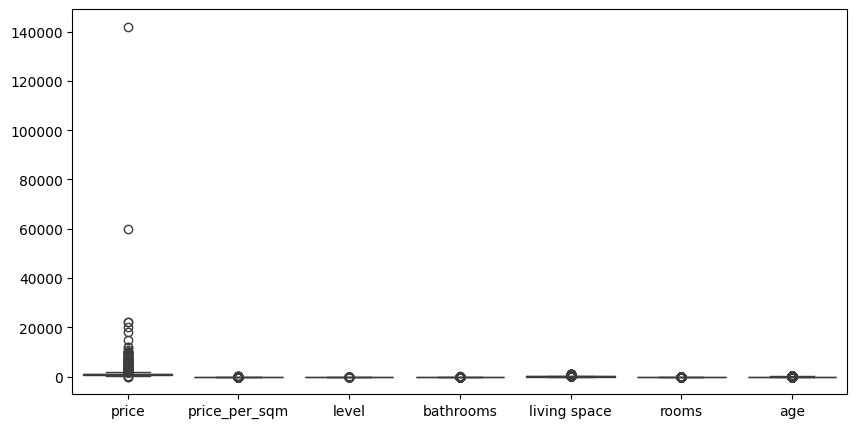

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Another boxplot visualization using Matplotlib and Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(df_selected)
plt.show()

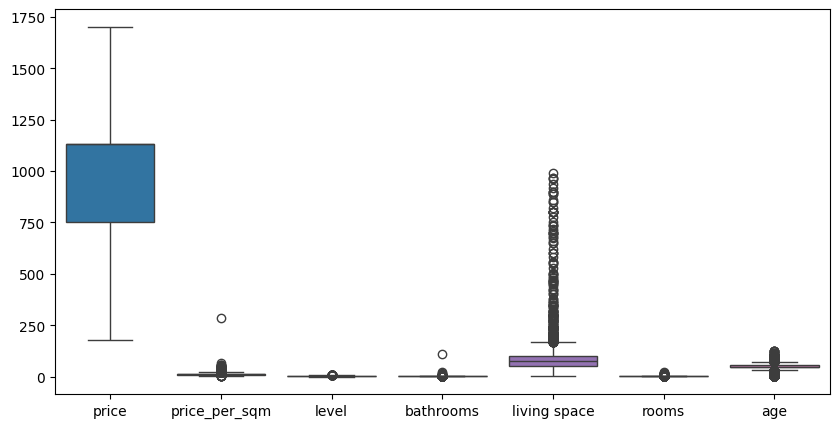

In [ ]:
import numpy as np
# Clipping outliers in the 'price' column
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
 # Calculate the first and third quartiles (Q1, Q3)
IQR = Q3 - Q1
# Clip the values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df_clean['price'] = df_clean['price'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR) # Calculate the Interquartile Range (IQR)

# Matplotlib and Seaborn boxplot visualization after clipping outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean)
plt.show()

In [ ]:
# Save the cleaned data to a new CSV file
df_clean.to_csv('xe_property_listings_cleaned.csv', index=False)

print("Data cleaning completed and saved to xe_property_listings_cleaned.csv")

Data cleaning completed and saved to xe_property_listings_cleaned.csv


<Axes: >

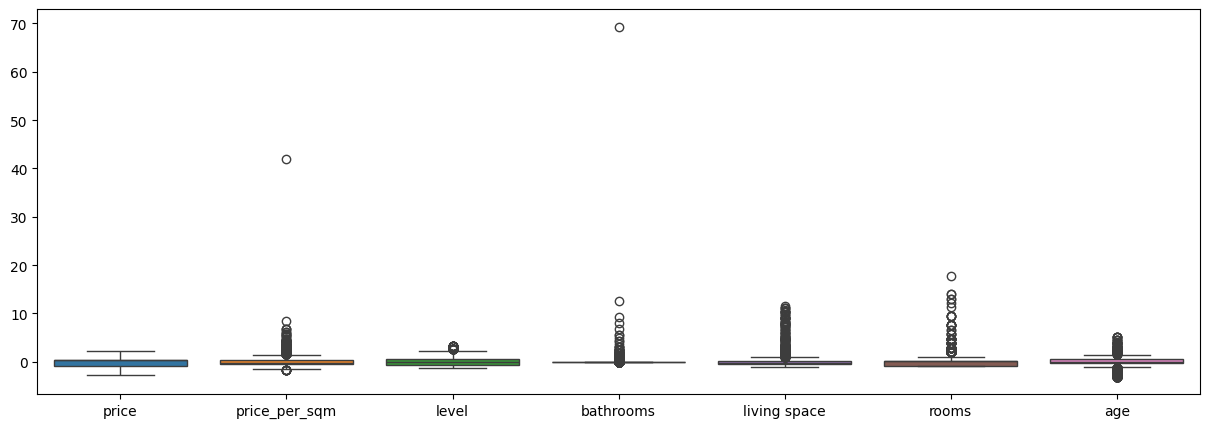

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the numeric columns
df_numeric = df_clean.select_dtypes(include=['number'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Boxplot visualization after standardization
boxplot_all(df_scaled)
plt.figure(figsize=(15, 5))
sns.boxplot(df_scaled)

Q-Q Plot Analysis for Normality
This code generates Q-Q (Quantile-Quantile) plots for all numeric columns in a given DataFrame to assess whether the data in each column follows a normal distribution.

The function qq_plot_all_columns takes a DataFrame (df_selected) as input.
It selects only the numeric columns from the DataFrame.
For each numeric column:
Missing values are excluded using the dropna() method.
A Q-Q plot is created using the scipy.stats.probplot function.
The Q-Q plot visually compares the distribution of the data to a theoretical normal distribution.
The plot shows whether the data aligns closely with the normal distribution line.
Each column is plotted individually with a title indicating the column name.

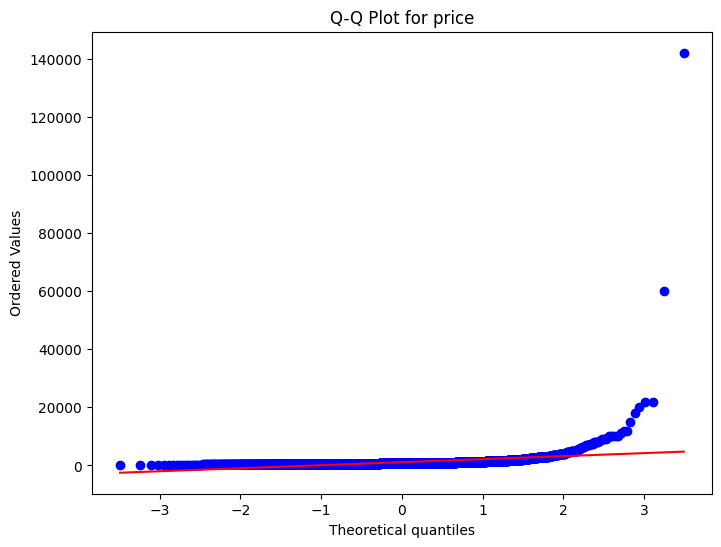

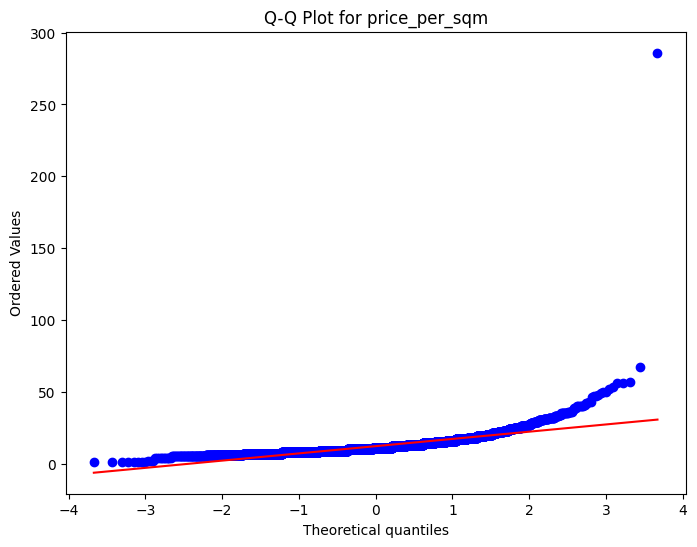

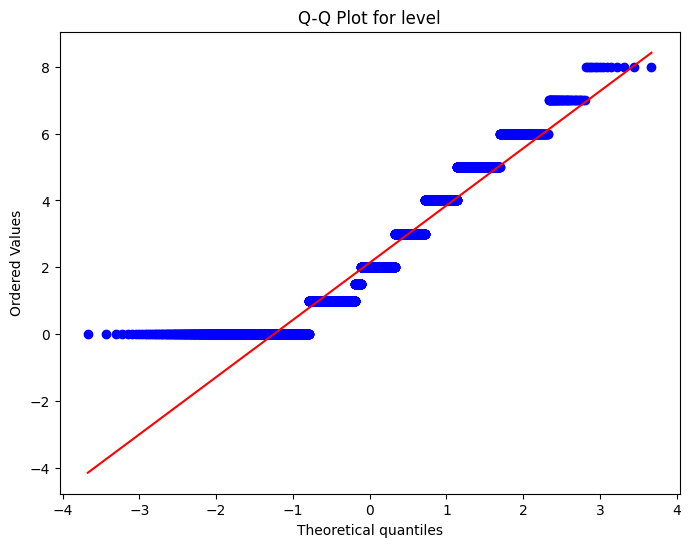

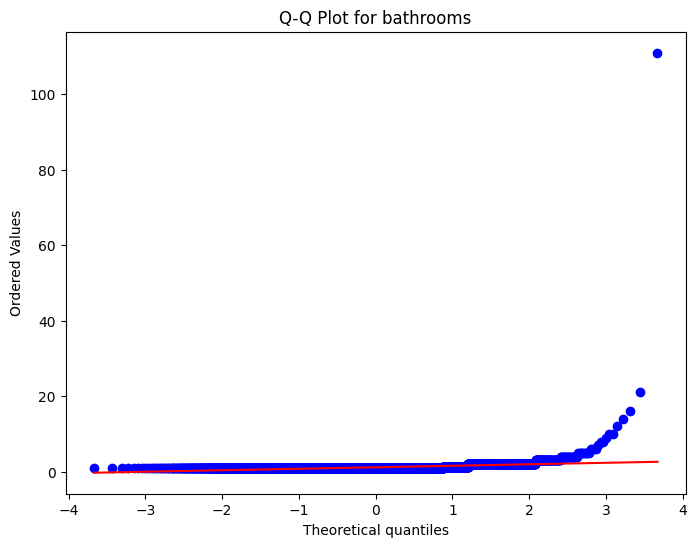

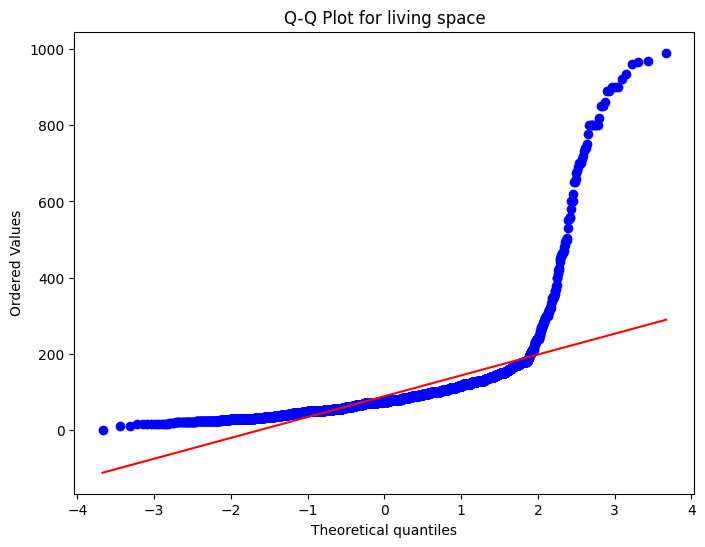

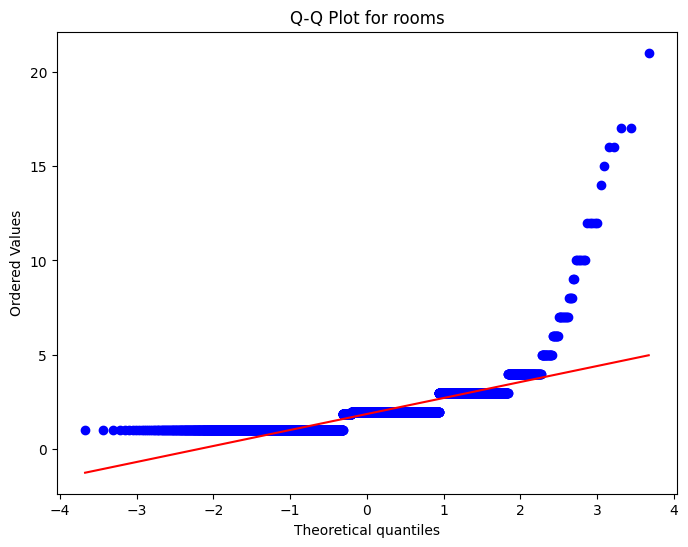

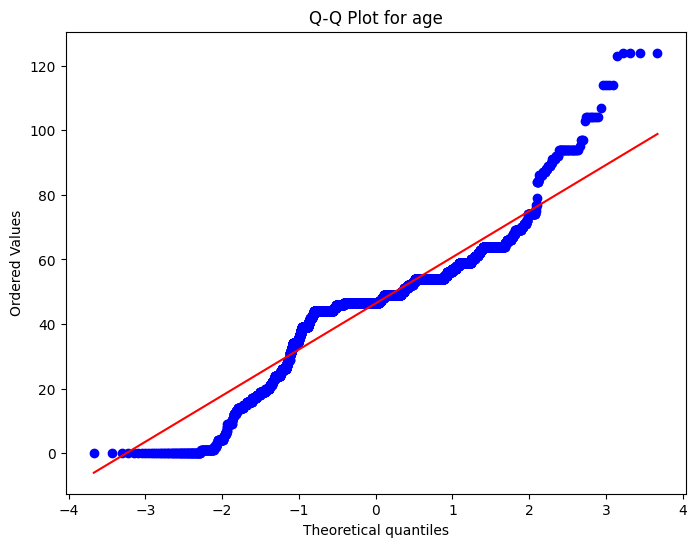

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generalized Q-Q plot function for all numeric columns
def qq_plot_all_columns(df_selected):
    # Select only numeric columns
    numeric_columns = df_selected.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    # Generate Q-Q plot for each numeric column
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        stats.probplot(df_selected[col].dropna(), dist="norm", plot=plt)  # Exclude missing values
        plt.title(f"Q-Q Plot for {col}")
        plt.show()

# Call the function for all numeric columns
qq_plot_all_columns(df_selected)

The Box-Cox transformation is a method used to stabilize variance and make the data closer to a normal distribution. It is commonly applied before performing statistical tests or building models that assume normally distributed data.

Steps for Box-Cox Transformation:
1. Ensure the data is positive (Box-Cox cannot handle non-positive values).
2. Apply a logarithmic or power transformation depending on the lambda value determined during the process.
3. After transformation, visualize the data using tools like Q-Q plots to confirm normality.

This process helps with:
- Reducing skewness in the data.
- Improving the performance of parametric statistical models.

living space for Box-Cox lambda: -0.20783594772210395
rooms for Box-Cox lambda: -0.901944578541937


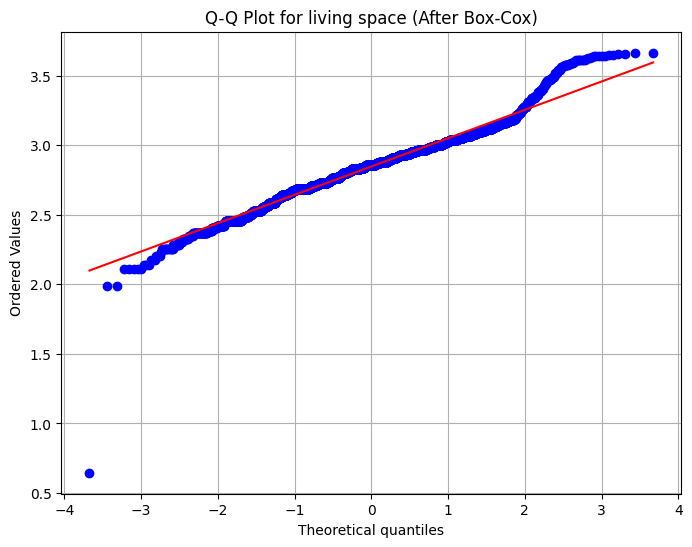

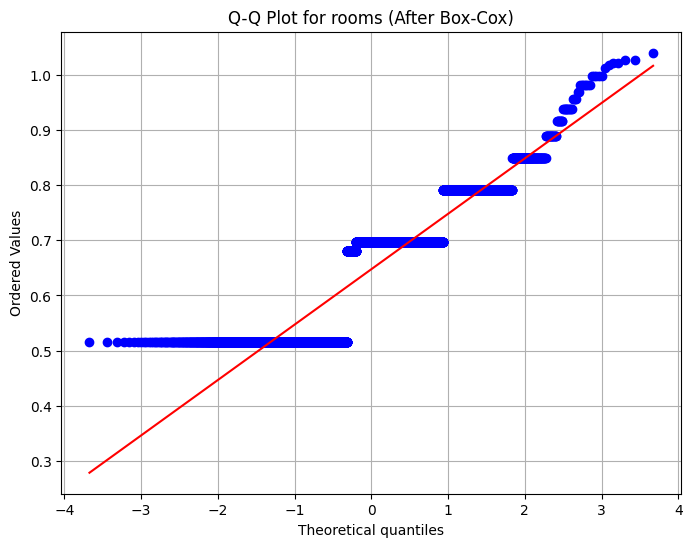

In [ ]:
# Import required libraries for Box-Cox transformation
from scipy.stats import boxcox
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the columns for Box-Cox transformation
columns_to_transform = ['living space', 'rooms']  # Columns to apply the transformation

# Apply Box-Cox transformation for specified columns
for col in columns_to_transform:
    # Check the minimum value and add a positive shift to make the data non-negative
    min_value = df_selected[col].min()
    shift = 1 if min_value > 0 else abs(min_value) + 1

    # Apply Box-Cox transformation
    df_selected[col], lambda_value = boxcox(df_selected[col] + shift)
    print(f"{col} for Box-Cox lambda: {lambda_value}")

# Function to create Q-Q plots for all specified columns after transformation
def qq_plot_all(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))
        # Create Q-Q plot to compare the data with a normal distribution
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for {col} (After Box-Cox)")
        plt.grid(True)
        plt.show()

# Generate Q-Q plots for the columns after Box-Cox transformation
qq_plot_all(df_selected, columns_to_transform)

# **Datenexploration, Statistische Analyse und Visualisierung**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

# Load the cleaned data
df_clean = pd.read_csv('xe_property_listings_cleaned.csv')

print(df_clean.dtypes)
print(df_clean)


url               object
price            float64
price_per_sqm      int64
level            float64
bathrooms        float64
address           object
type              object
living space     float64
rooms            float64
age              float64
dtype: object
                                                    url   price  \
0     https://www.xe.gr/en/property/d/property-to-re...   480.0   
1     https://www.xe.gr/en/property/d/property-to-re...   600.0   
2     https://www.xe.gr/en/property/d/property-to-re...   850.0   
3     https://www.xe.gr/en/property/d/property-to-re...   800.0   
4     https://www.xe.gr/en/property/d/property-to-re...  2200.0   
...                                                 ...     ...   
5746  https://www.xe.gr/en/property/d/property-to-re...  1100.0   
5747  https://www.xe.gr/en/property/d/property-to-re...  1000.0   
5748  https://www.xe.gr/en/property/d/property-to-re...   850.0   
5749  https://www.xe.gr/en/property/d/property-to-re...   850.0   

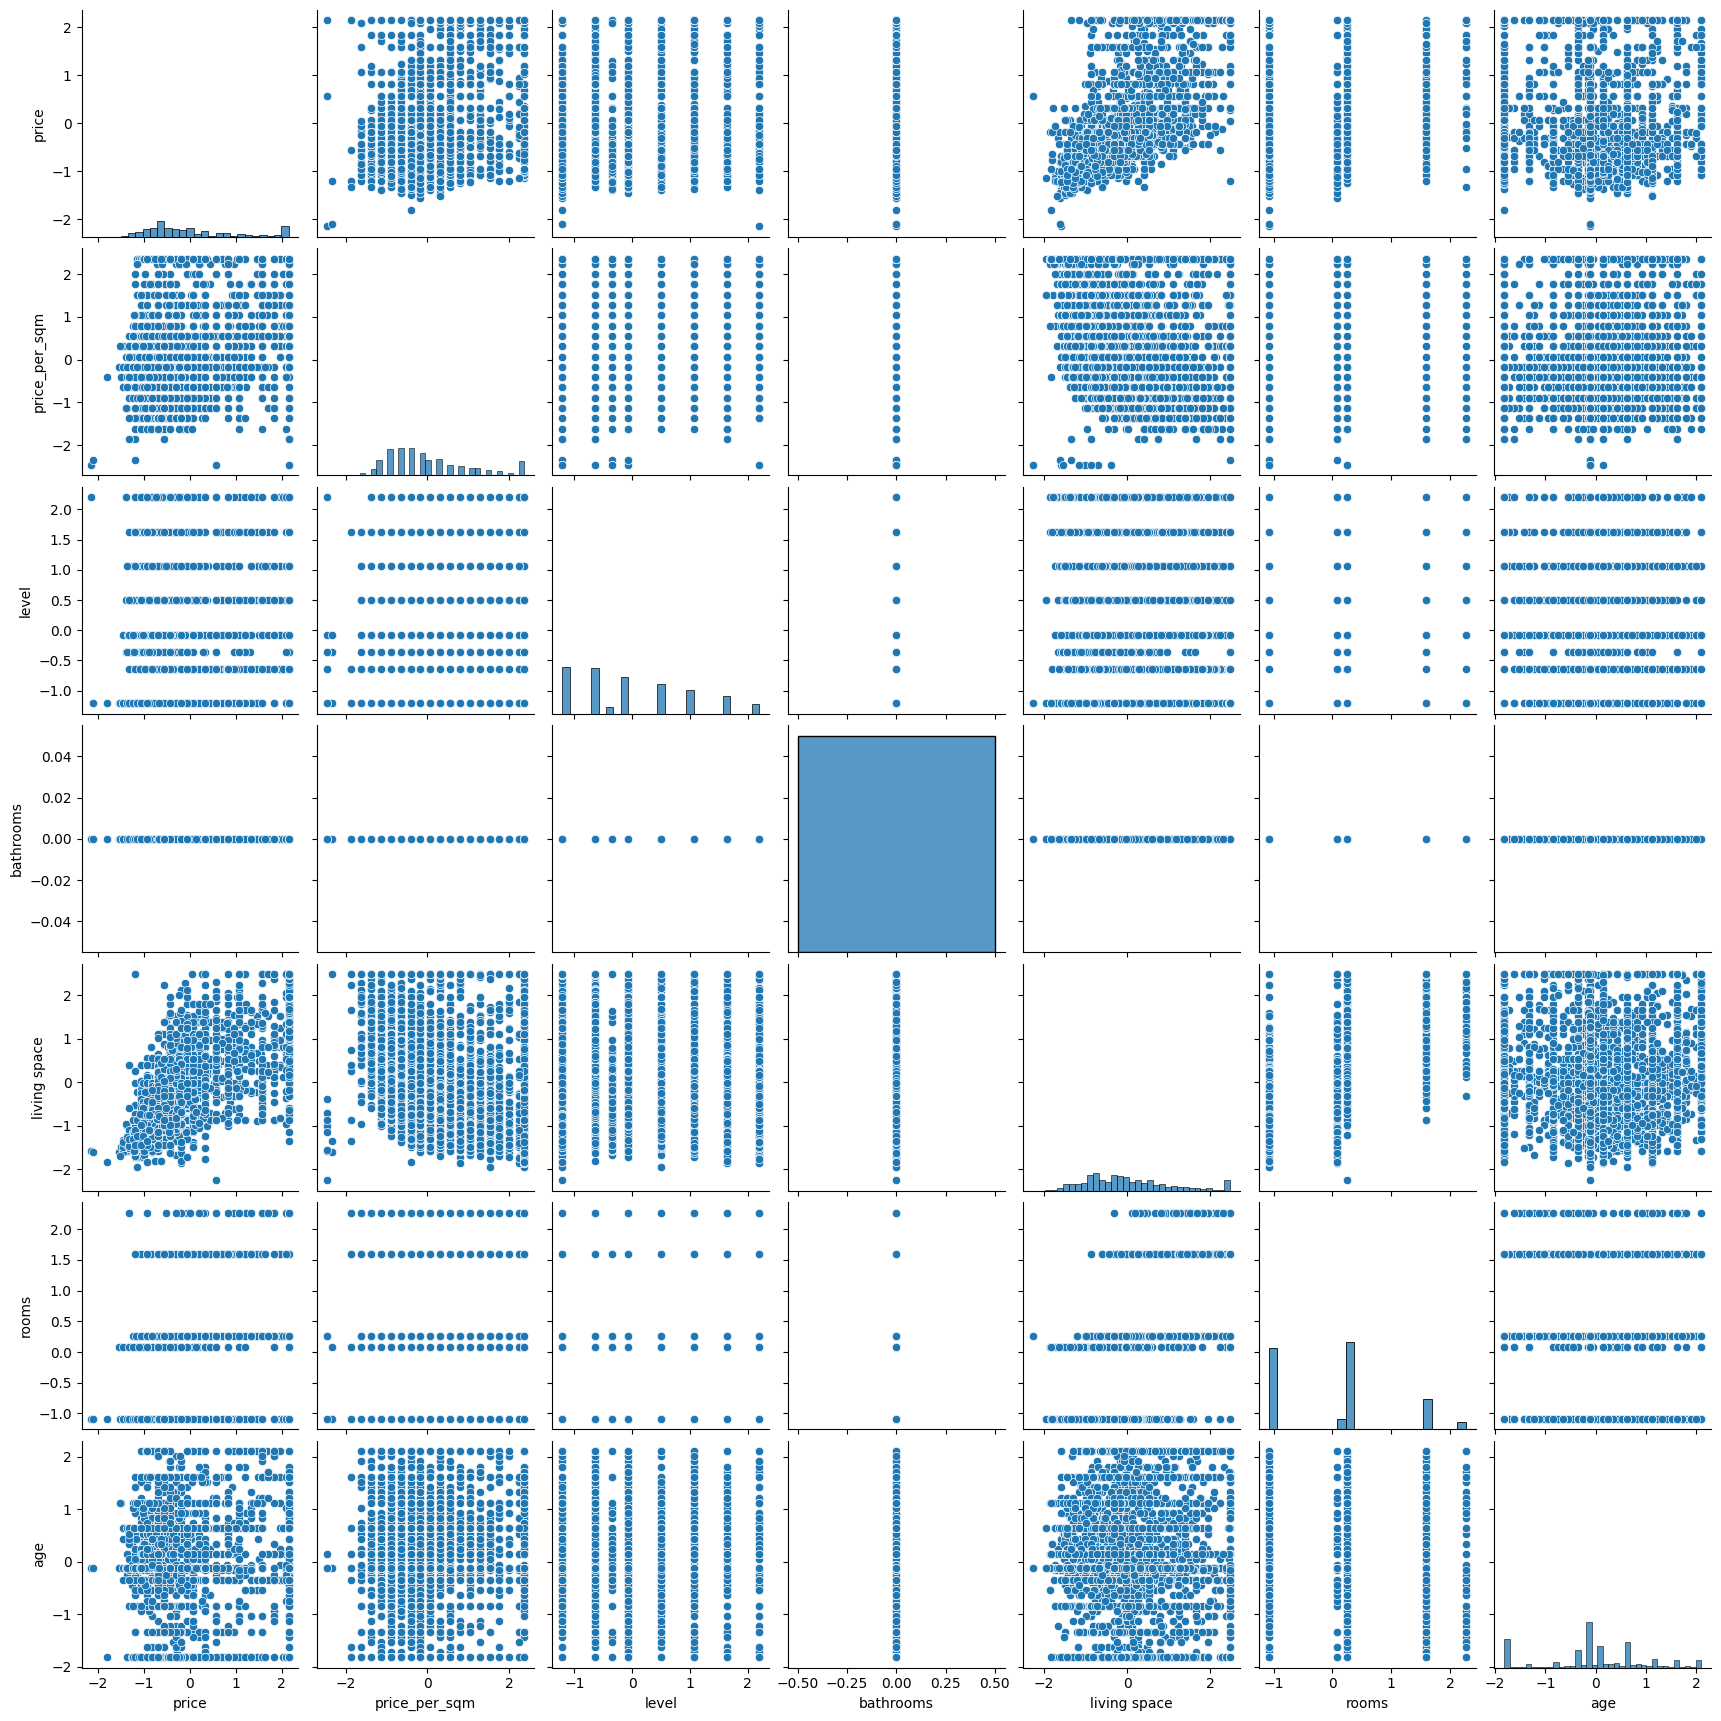

In [ ]:
# Visualize relationships between all columns using a scatter matrix
fig = px.scatter_matrix(df_selected, dimensions=df_selected.columns)
fig.show()

# Visualize pairwise relationships in a scaled DataFrame using Seaborn
sns.pairplot(df_scaled)

In [ ]:
# Histogram for all numeric columns
def plot_histograms(df_selected):
    for col in df_selected.columns:
        # Create a histogram for each column using Plotly
        fig = px.histogram(df_selected, x=col, title=f'Histogram for {col}')
        fig.show()

# Call the function to plot histograms
plot_histograms(df_selected)

In [ ]:
# Statistical Analysis: Calculate mean, median, and standard deviation for relevant columns
stats = df_clean[['price', 'price_per_sqm', 'level', 'rooms', 'bathrooms','age']].agg(['mean', 'median', 'std'])
print(stats)
df_clean.describe().T

              price  price_per_sqm     level     rooms  bathrooms        age
mean    1130.993691      12.122761  2.139019  1.872952   1.190109  46.402963
median   750.000000      11.000000  2.000000  2.000000   1.000000  46.402963
std     3139.533378       6.521501  1.790147  1.079075   1.583656  15.130900


count         mean          std   min    25%         50%  \
price          2853.0  1130.993691  3139.533378  23.0  600.0  750.000000   
price_per_sqm  5751.0    12.122761     6.521501   1.0    9.0   11.000000   
level          5751.0     2.139019     1.790147   0.0    1.0    2.000000   
bathrooms      5751.0     1.190109     1.583656   1.0    1.0    1.000000   
living space   5751.0    88.927317    78.491851   1.0   54.0   75.000000   
rooms          5751.0     1.872952     1.079075   1.0    1.0    2.000000   
age            5751.0    46.402963    15.130900   0.0   44.0   46.402963   

                  75%       max  
price          1050.0  142000.0  
price_per_sqm    14.0     286.0  
level             3.0       8.0  
bathrooms         1.0     111.0  
living space    100.0     990.0  
rooms             2.0      21.0  
age              54.0     124.0

In [ ]:
# Function to plot histograms for all columns in the selected DataFrame
def plot_histograms(df_selected):
    for col in df_selected.columns:
        # Create a histogram for each column with mean, mode, and standard deviation lines
        fig = px.histogram(df_selected, x=col, title=f'Histogram for {col}')
        fig.add_vline(x=df_selected[col].mean(), line_dash='dash', line_color='orange', annotation_text='Mean')
        fig.add_vline(x=df_selected[col].mode()[0], line_dash='dash', line_color='red', annotation_text='Modus')
        fig.add_vline(x=df_selected[col].std(), line_dash='dash', line_color='green', annotation_text='Standard Deviation')
        fig.show()

# Call the histogram plotting function
plot_histograms(df_selected)

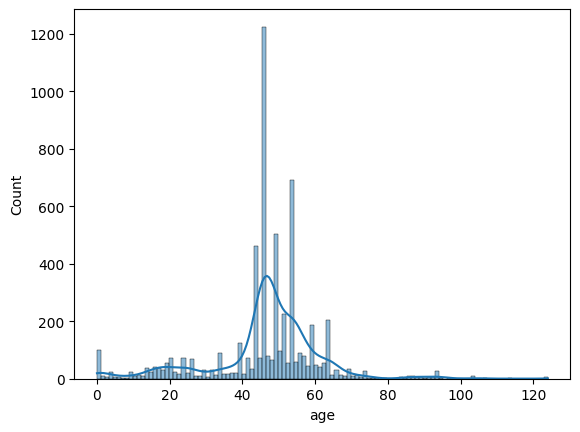

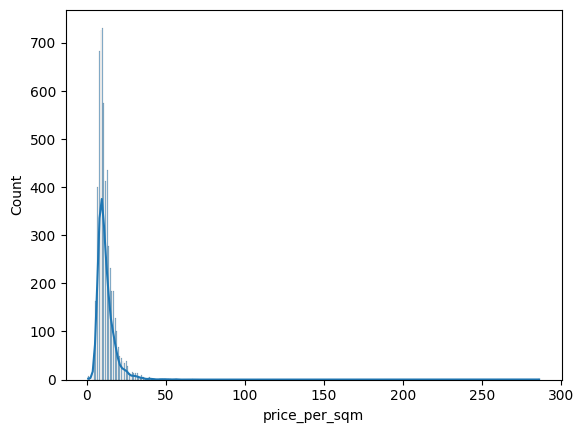

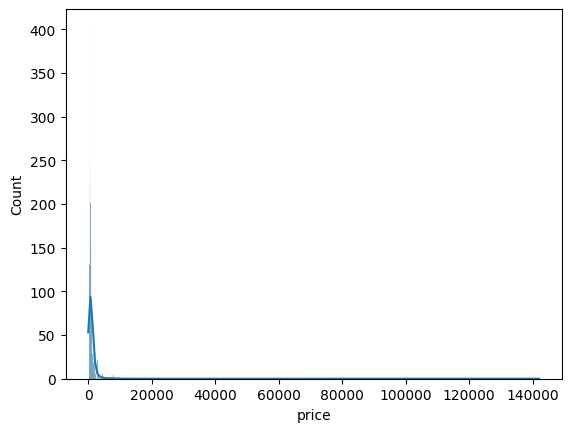

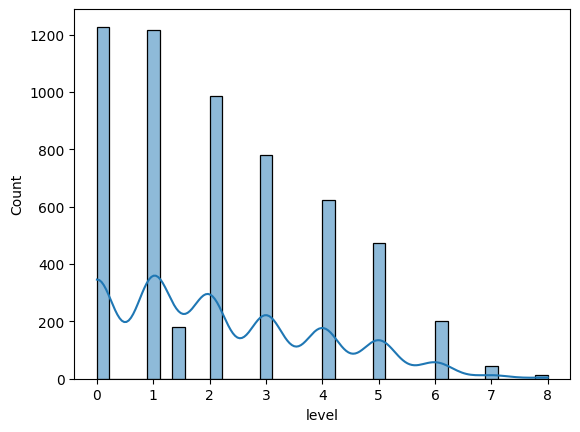

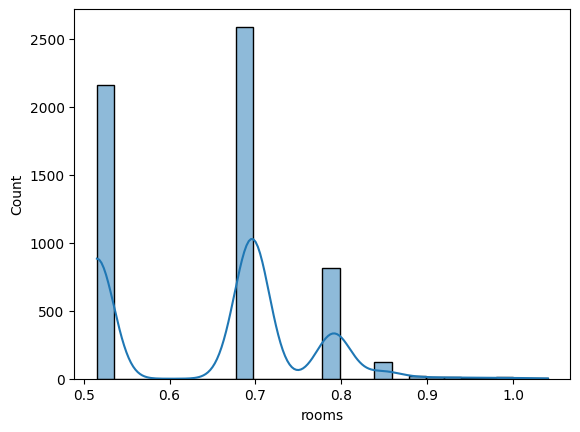

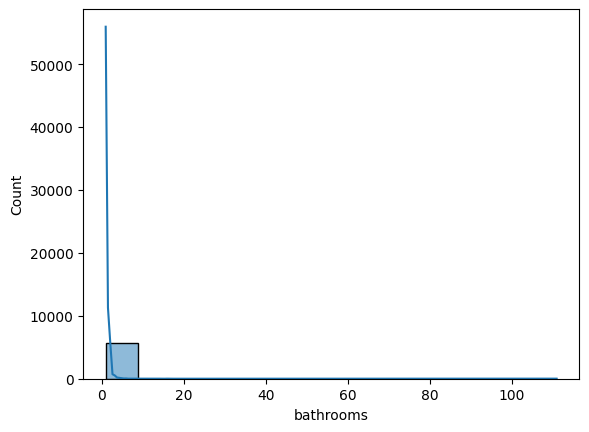

In [ ]:
# KDE plot for the distribution of the 'age' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['age'], kde=True)
plt.show()

# KDE plot for the distribution of the 'price_per_sqm' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['price_per_sqm'], kde=True)
plt.show()

# KDE plot for the distribution of the 'price' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['price'], kde=True)
plt.show()

# KDE plot for the distribution of the 'level' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['level'], kde=True)
plt.show()

# KDE plot for the distribution of the 'rooms' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['rooms'], kde=True)
plt.show()

# KDE plot for the distribution of the 'bathrooms' column using Seaborn
plt.figure()
ax = sns.histplot(df_selected['bathrooms'], kde=True)
plt.show()


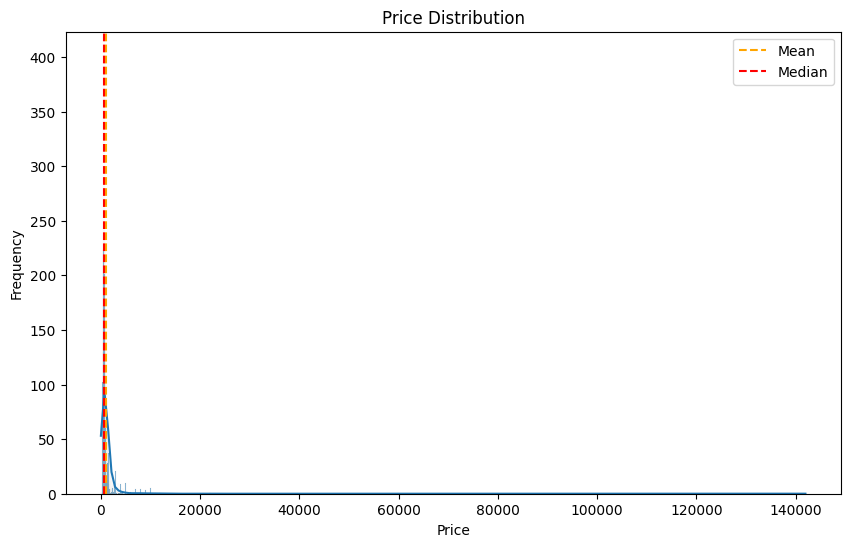

In [ ]:
# Histogram for price distribution with mean and median lines
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], kde=True)
plt.axvline(x=df_clean['price'].mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(x=df_clean['price'].median(), color='red', linestyle='--', label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


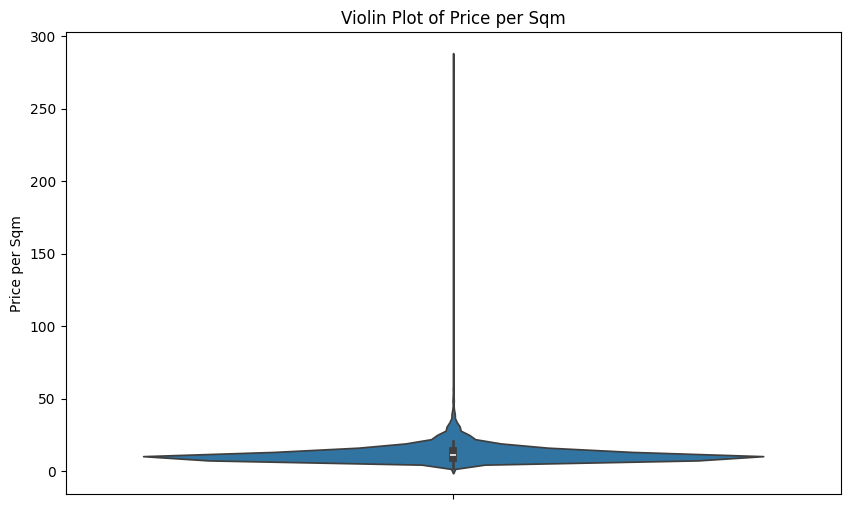

In [ ]:
# Violin plot for price_per_sqm distribution
plt.figure(figsize=(10, 6))
sns.violinplot(y=df_clean['price_per_sqm'])
plt.title('Violin Plot of Price per Sqm')
plt.ylabel('Price per Sqm')
plt.show()

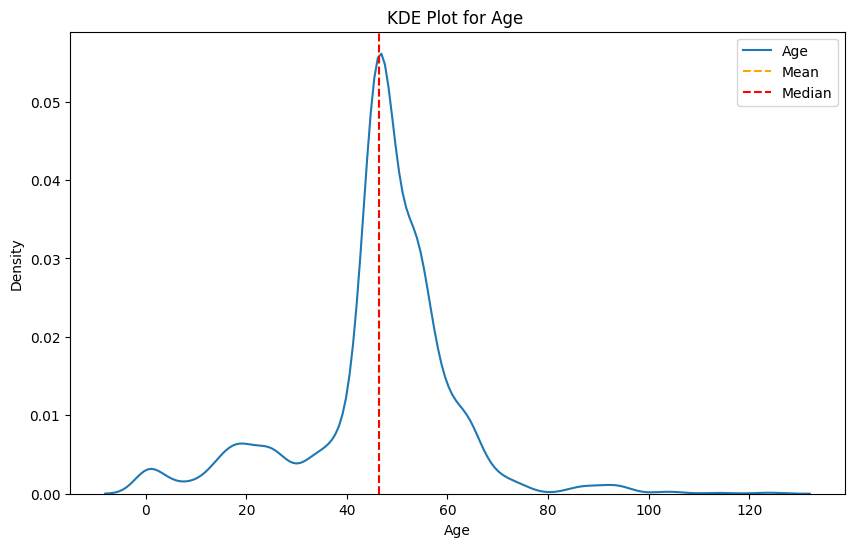

In [ ]:
# KDE plot for age_of_property distribution with mean and median lines
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean['age'], label='Age')
plt.axvline(x=df_clean['age'].mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(x=df_clean['age'].median(), color='red', linestyle='--', label='Median')
plt.title('KDE Plot for Age ')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Scatter plots for visualizing correlations between multiple features
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, shared_yaxes=True,
                    subplot_titles=("Price vs Level", "Price vs Age",
                                    "Price per Sqm vs Rooms", "Rooms vs Age"))

# Scatter plot for 'Price' vs 'Level'
fig.add_trace(px.scatter(df_clean, x='price', y='level').data[0], row=1, col=1)

# Scatter plot for 'Price' vs 'Age'
fig.add_trace(px.scatter(df_clean, x='price', y='age').data[0], row=1, col=2)

# Scatter plot for 'Price per Sqm' vs 'Rooms'
fig.add_trace(px.scatter(df_clean, x='price_per_sqm', y='rooms').data[0], row=2, col=1)

# Scatter plot for 'Rooms' vs 'Age'
fig.add_trace(px.scatter(df_clean, x='rooms', y='age').data[0], row=2, col=2)

# Update layout of the scatter plots
fig.update_layout(height=800, width=800, title_text="Scatter Plots for Correlations", showlegend=False)
fig.show()

In [ ]:
# Standardizing the numeric columns for further analysis
df_numeric = df_clean.select_dtypes(include=['number'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

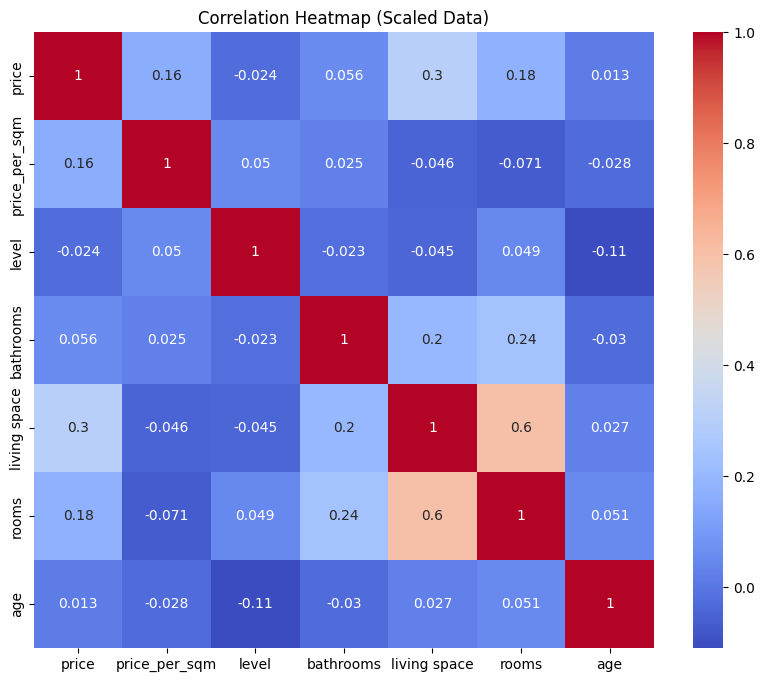

In [ ]:
# Heatmap for scaled data
plt.figure(figsize=(10, 8))
scaled_correlation_matrix = df_scaled.corr()
sns.heatmap(scaled_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Scaled Data)')
plt.show()


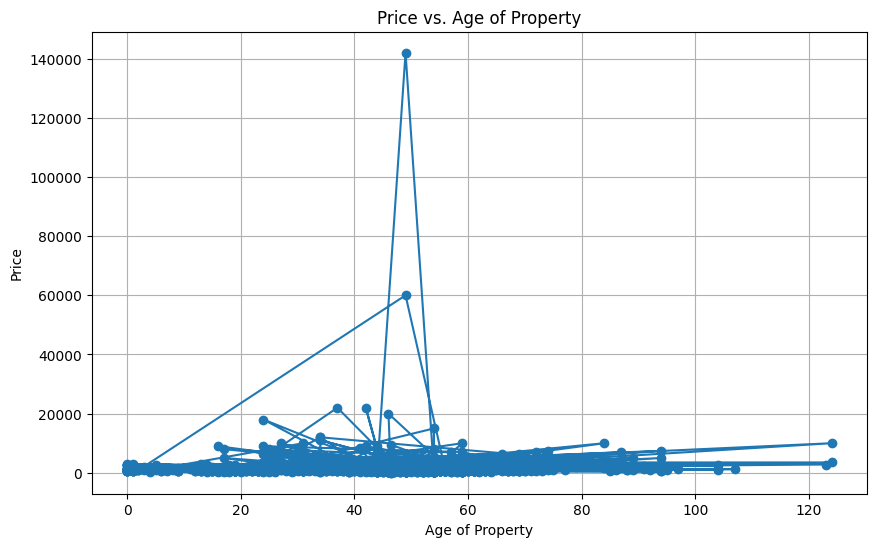

In [ ]:
# Line plot for 'Price' vs 'Age of Property'
plt.figure(figsize=(10, 6))
plt.plot(df_clean['age'], df_clean['price'], marker='o')
plt.title('Price vs. Age of Property')
plt.xlabel('Age of Property')
plt.ylabel('Price')
plt.grid(True)
plt.show()

25.674107142857142


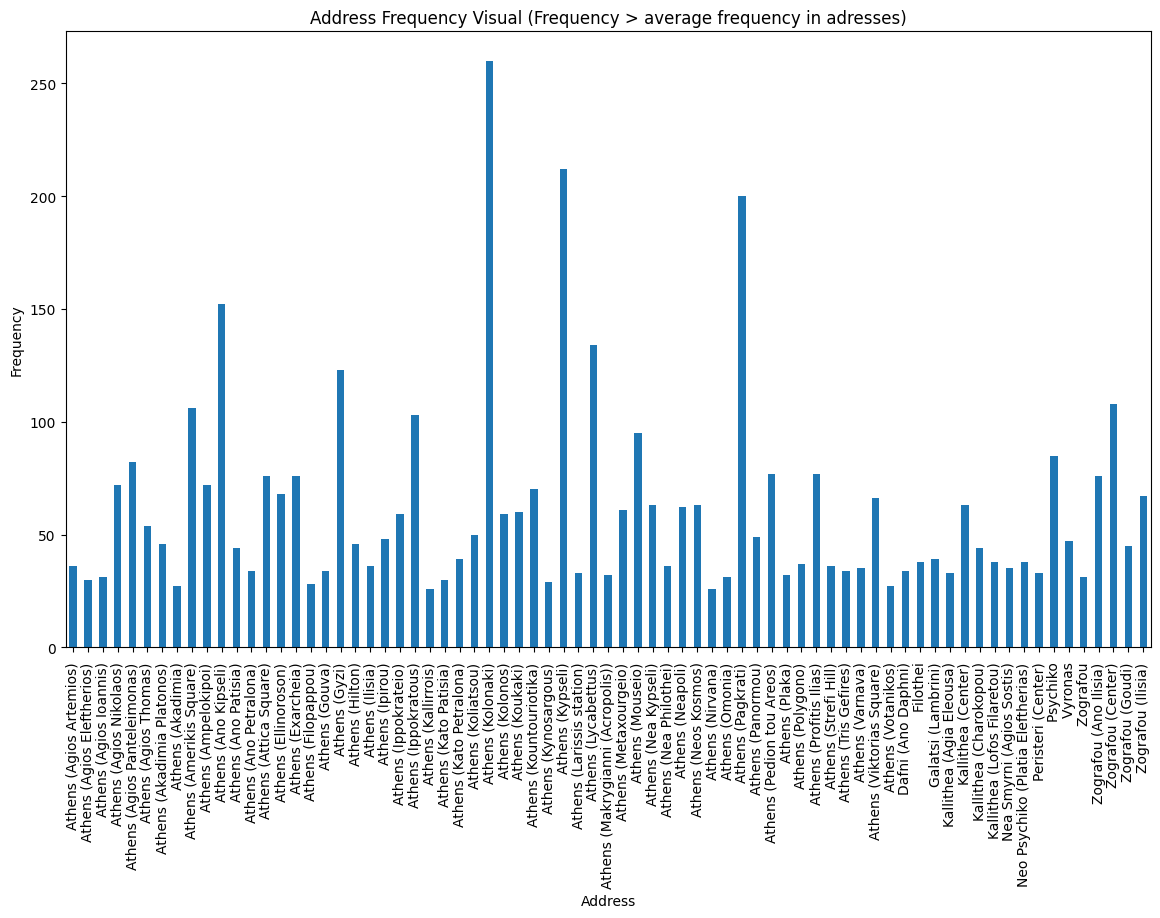

In [ ]:
# Copy the cleaned DataFrame to preserve the original one
df_copy = df_clean.copy()

# Calculate the frequency of each address
address_counts = df_copy["address"].value_counts()

# Sort address counts by index and calculate the average frequency
address_counts = address_counts.sort_index()
average_frequency = address_counts.mean()
print(average_frequency)

# Filter addresses with frequency greater than the average frequency
filtered_address_counts = address_counts[address_counts > average_frequency]

# Plot a bar chart of the filtered address frequencies
plt.figure(figsize=(14, 8))
filtered_address_counts.plot(kind="bar")
plt.xlabel("Address")
plt.ylabel("Frequency")
plt.title("Address Frequency Visual (Frequency > average frequency in addresses)")
plt.show()


In [ ]:
# Calculate the frequency of each address
address_counts = df_copy["address"].value_counts()

# Calculate the mean frequency
mean_frequency = sum(address_counts) / len(address_counts)
rounded_mean_frequency = np.round(mean_frequency)

# Print the mean and rounded mean frequency
print(f"Mean: {mean_frequency:.2f}")
print(f"Rounded Mean: {rounded_mean_frequency}")

# Find addresses closest to the mean frequency
closest_addresses = address_counts[address_counts == rounded_mean_frequency].index.tolist()
print(f"Addresses closest to the mean frequency: {closest_addresses}")

# Calculate the mode (most frequent value) of the address counts
modus = address_counts.mode()[0]
print(f"Mode: {modus}")

# Find addresses matching the mode frequency
modus_addresses = address_counts[address_counts == modus].index.tolist()
print(f"Addresses matching the mode frequency: {modus_addresses}")

Ortalama: 25.67
Yuvarlanmış Ortalama: 26.0
Ortalama frekansa denk gelen adresler: ['Athens (Nirvana) ', 'Athens (Kallirrois) ']
Mod: 1
Mod frekansına denk gelen adresler: ['Dafni (Ano Nea Smyrni) ', 'Peristeri (Aspra Chomata) ', 'Ilion (Nea Sepolia) ', 'Neo Psychiko (Ellinoroson) ', 'Ymittos (Ymittos limits) ', 'Chalandri ', 'Sykies (Ippokratous) ', 'Galatsi (Attiko Alsos) ', 'Kaisariani ', 'Vyronas (Kareas) ', 'Marousi (Alsoupoli) ', 'Papagou (Alsos Papagou) ', 'Filothei (Veikou Grove) ', 'Galatsi (Veikou Grove) ', 'Nea Filadelfeia (Ampelia) ', 'Egaleo (Eleonas (Petrou Ralli - Iera Odos)) ', 'Athens (Kritika) ', 'Kaisariani (Ilisia) ', 'Galatsi (Grava) ', 'Athens (Evangelistria) ', 'Athens (Ymittos limits) ', 'Athens (Klathmonos Square) ', 'Ymittos (Iroon Square) ', 'Athens (Agios Ioannis Theologos) ', 'Athens (Niar Ist) ', 'Athens (Ano Daphni) ', 'Kallithea (Lachanagora) ', 'Athens (Ano Kaisariani) ', 'Athens (Alsos) ', 'Athens (Pentagono) ', 'Athens (Lofos Sikelias) ', 'Athens (Kalo

# **Wahrscheinlichkeiten**

In [ ]:
# Descriptive Statistics: Calculate mean, median, std, min, max for relevant columns
descriptive_stats = df_clean[['price', 'price_per_sqm', 'level', 'rooms', 'bathrooms','living space']].describe()
print(descriptive_stats)

# Formulate two events:
# Event A: Properties with price_per_sqm greater than the median price_per_sqm
event_A = df_clean[df_clean['price_per_sqm'] > df_clean['price_per_sqm'].median()]

# Event B: Properties with more than 2 bedrooms
event_B = df_clean[df_clean['rooms'] > 2]

# Probability of Event A occurring
P_A = len(event_A) / len(df_clean)

# Probability of Event B occurring
P_B = len(event_B) / len(df_clean)

# Probability of Event A occurring given Event B has occurred (P(A|B))
P_A_given_B = len(event_A[event_A.index.isin(event_B.index)]) / len(event_B)

# Probability of Event B occurring given Event A has occurred (P(B|A))
P_B_given_A = len(event_B[event_B.index.isin(event_A.index)]) / len(event_A)

print(f"Probability of Event A (Properties with price_per_sqm greater than median): {P_A}")
print(f"Probability of Event B (Properties with more than 2 bedrooms): {P_B}")
print(f"Probability of Event A given Event B (P(A|B)): {P_A_given_B}")
print(f"Probability of Event B given Event A (P(B|A)): {P_B_given_A}")

               price  price_per_sqm        level        rooms    bathrooms  \
count    2853.000000    5751.000000  5751.000000  5751.000000  5751.000000   
mean     1130.993691      12.122761     2.139019     1.872952     1.190109   
std      3139.533378       6.521501     1.790147     1.079075     1.583656   
min        23.000000       1.000000     0.000000     1.000000     1.000000   
25%       600.000000       9.000000     1.000000     1.000000     1.000000   
50%       750.000000      11.000000     2.000000     2.000000     1.000000   
75%      1050.000000      14.000000     3.000000     2.000000     1.000000   
max    142000.000000     286.000000     8.000000    21.000000   111.000000   

       living space  
count   5751.000000  
mean      88.927317  
std       78.491851  
min        1.000000  
25%       54.000000  
50%       75.000000  
75%      100.000000  
max      990.000000  
Probability of Event A (Properties with price_per_sqm greater than median): 0.4157537819509651
Prob

In [ ]:
# Event C: Properties with price greater than the median price
event_C = df_clean[df_clean['price'] > df_clean['price'].median()]

# Event D: Properties with age_of_property less than 10 years
event_D = df_clean[df_clean['age'] < 10]

# Probability of Event C occurring
P_C = len(event_C) / len(df_clean)

# Probability of Event D occurring
P_D = len(event_D) / len(df_clean)

# Probability of Event C occurring given Event D has occurred (P(C|D))
P_C_given_D = len(event_C[event_C.index.isin(event_D.index)]) / len(event_D)

# Probability of Event D occurring given Event C has occurred (P(D|C))
P_D_given_C = len(event_D[event_D.index.isin(event_C.index)]) / len(event_C)

print(f"Probability of Event C (Properties with price greater than median): {P_C}")
print(f"Probability of Event D (Properties with age_of_property less than 10 years): {P_D}")
print(f"Probability of Event C given Event D (P(C|D)): {P_C_given_D}")
print(f"Probability of Event D given Event C (P(D|C)): {P_D_given_C}")

Probability of Event C (Properties with price greater than median): 0.2324813075986785
Probability of Event D (Properties with age_of_property less than 10 years): 0.030429490523387236
Probability of Event C given Event D (P(C|D)): 0.33714285714285713
Probability of Event D given Event C (P(D|C)): 0.044128646222887064


# **Machine Learning**

## **Clustering**

If one feature, "price," ranges from 200 to 1800, while another feature, "age," ranges from 1 to 100, "price" will dominate the distance calculations due to the scale difference.

**StandardScaler** normalizes the data and brings each feature to the same scale:

It transforms each feature so that it has a mean of 0 and a standard deviation of 1. This process eliminates scale differences between features and ensures that each feature has equal weight.

                                                 url        price  \
0  https://www.xe.gr/en/property/d/property-to-re...   480.000000   
1  https://www.xe.gr/en/property/d/property-to-re...   600.000000   
2  https://www.xe.gr/en/property/d/property-to-re...   850.000000   
3  https://www.xe.gr/en/property/d/property-to-re...   800.000000   
4  https://www.xe.gr/en/property/d/property-to-re...  1702.484227   

   price_per_sqm  level  bathrooms                  address       type  \
0             12    4.0        1.0  Athens (Attica Square)   Apartment   
1             11    1.0        1.0    Athens (Ano Kipseli)   Apartment   
2              9    2.0        1.0       Athens (Polygono)   Apartment   
3              7    1.0        1.0  Athens (Agios Ioannis)   Apartment   
4             18    4.0        1.0       Athens (Kolonaki)   Apartment   

   living space  rooms        age  
0          39.0    1.0  24.000000  
1          53.0    2.0  46.402963  
2          97.0    4.0  41.00000

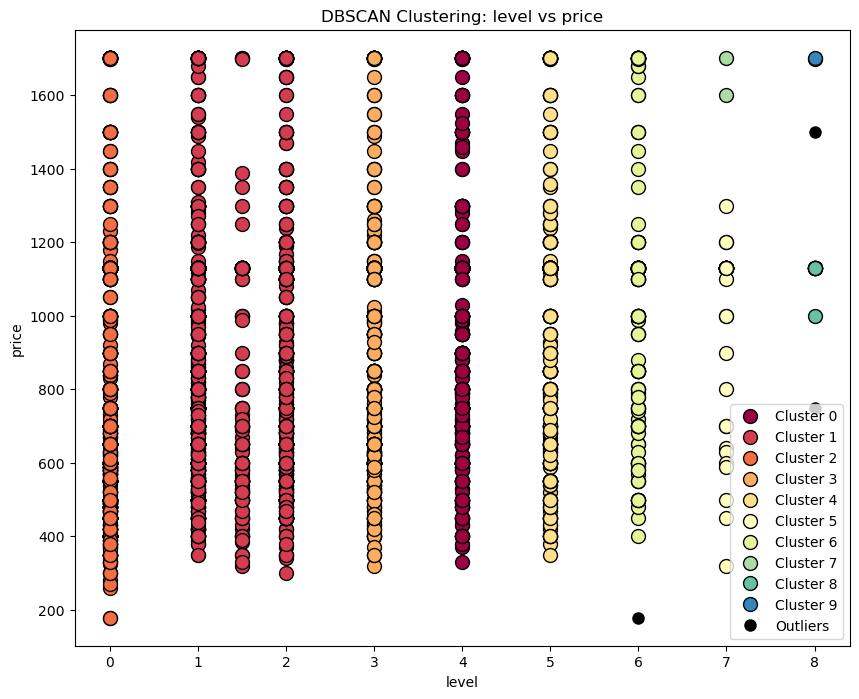

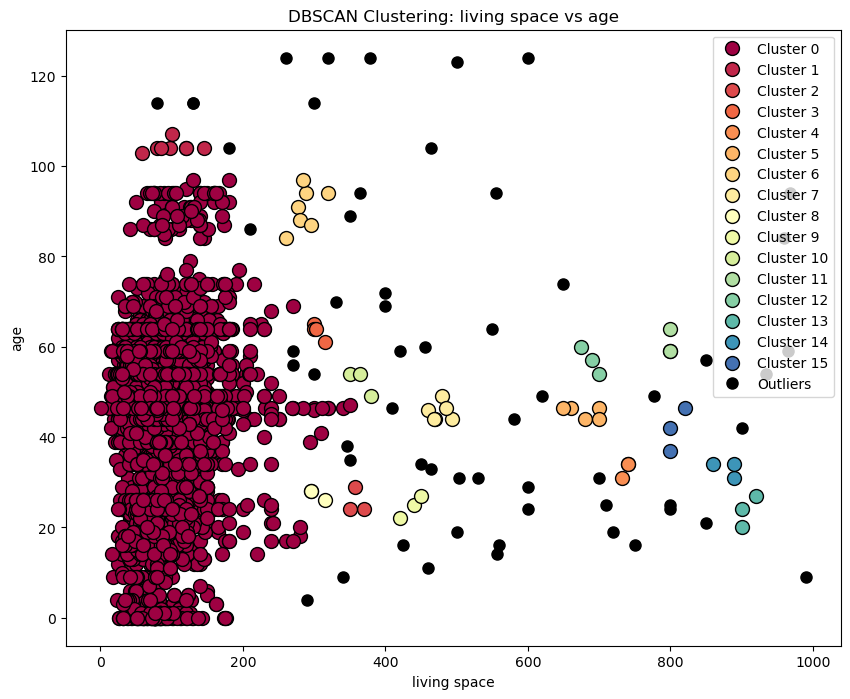

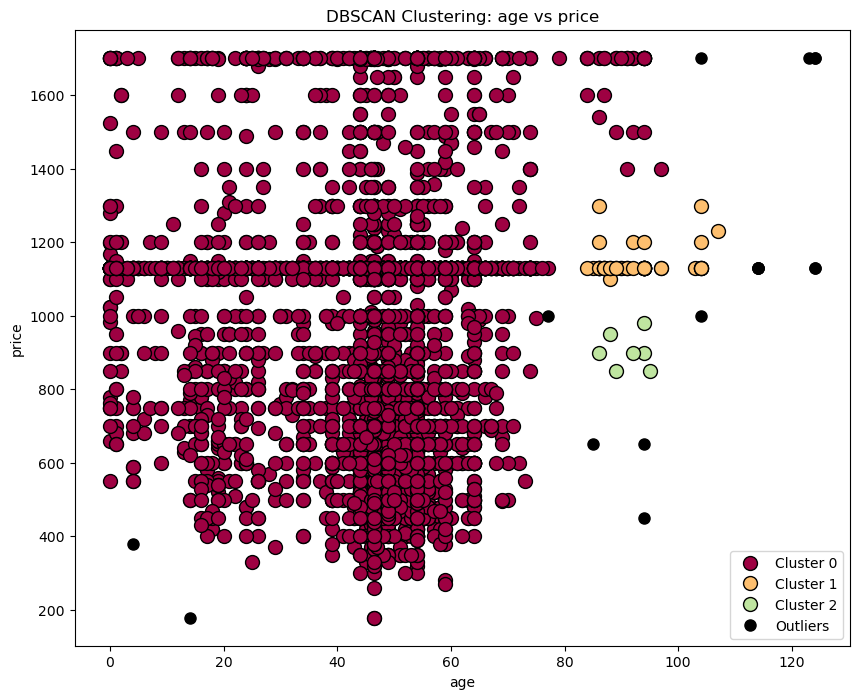

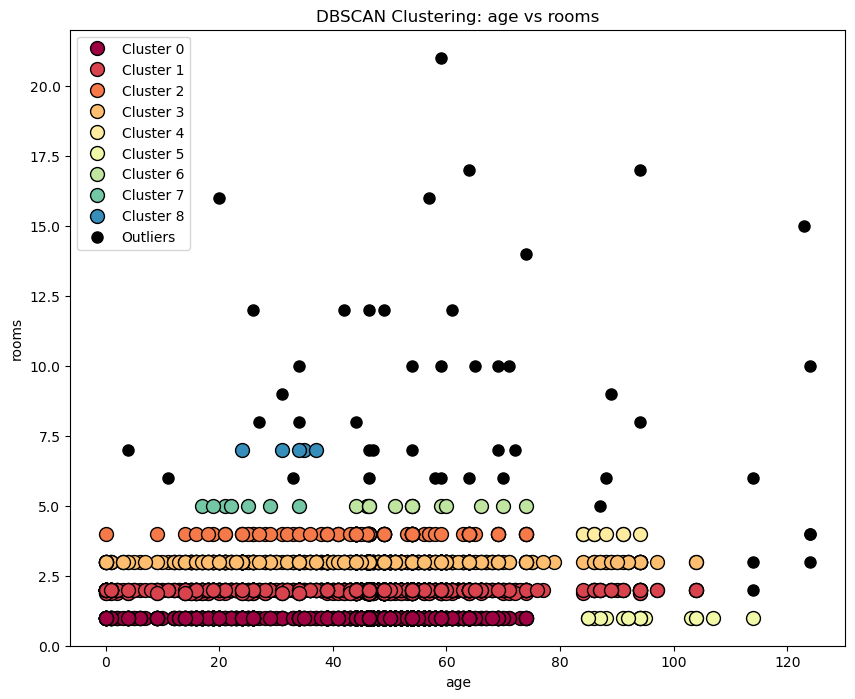

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = "C:/Users/kutay/Downloads/xe_property_listings_cleaned.csv"
data = pd.read_csv(file_path)

# Preview the first few rows of the data
print(data.head())

# Define feature pairs and DBSCAN parameters
feature_params = [
    # Feature pair and corresponding DBSCAN parameters
    ('level', 'price', {'eps': 0.5, 'min_samples': 2}),
    ('living space', 'age', {'eps': 0.4, 'min_samples': 3}),
    ('age', 'price', {'eps': 0.4, 'min_samples': 5}),
    ('age', 'rooms', {'eps': 0.6, 'min_samples': 5})
]

# Perform clustering and visualization for each feature pair
for selected_columns, dbscan_params in [(fp[:2], fp[2]) for fp in feature_params]:
    # Select the relevant features
    X = data[list(selected_columns)].dropna()  # Remove missing values

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply the DBSCAN algorithm
    dbscan = DBSCAN(eps=dbscan_params['eps'], min_samples=dbscan_params['min_samples'])
    labels = dbscan.fit_predict(X_scaled)

    # Add labels to the dat
    X['Cluster'] = labels

    # Visualize the clusters
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black color for outliers
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8 if k == -1 else 10, label=f"Cluster {k}" if k != -1 else "Outliers")

    # Chart title and labels
    plt.title(f"DBSCAN Clustering: {selected_columns[0]} vs {selected_columns[1]}")
    plt.xlabel(selected_columns[0])
    plt.ylabel(selected_columns[1])
    plt.legend()
    plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = "C:/Users/kutay/Downloads/xe_property_listings_cleaned.csv"
data = pd.read_csv(file_path)

# Preview the first few rows of the data
print(data.head())


                                                 url        price  \
0  https://www.xe.gr/en/property/d/property-to-re...   480.000000   
1  https://www.xe.gr/en/property/d/property-to-re...   600.000000   
2  https://www.xe.gr/en/property/d/property-to-re...   850.000000   
3  https://www.xe.gr/en/property/d/property-to-re...   800.000000   
4  https://www.xe.gr/en/property/d/property-to-re...  1702.484227   

   price_per_sqm  level  bathrooms                  address       type  \
0             12    4.0        1.0  Athens (Attica Square)   Apartment   
1             11    1.0        1.0    Athens (Ano Kipseli)   Apartment   
2              9    2.0        1.0       Athens (Polygono)   Apartment   
3              7    1.0        1.0  Athens (Agios Ioannis)   Apartment   
4             18    4.0        1.0       Athens (Kolonaki)   Apartment   

   living space  rooms        age  
0          39.0    1.0  24.000000  
1          53.0    2.0  46.402963  
2          97.0    4.0  41.00000

In [ ]:
# Define feature pairs and K-Means parameters
feature_params = [
    # Feature pair and corresponding K-Means parameters
    ('level', 'price', {'n_clusters': 3}),
    ('living space', 'age', {'n_clusters': 4}),
    ('age', 'price', {'n_clusters': 5}),
    ('age', 'rooms', {'n_clusters': 6})
]


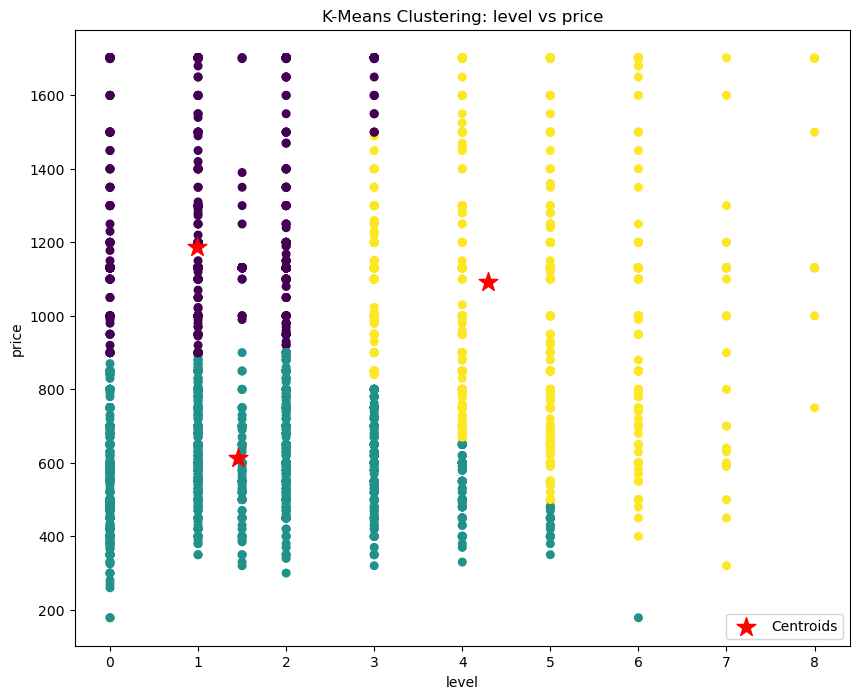

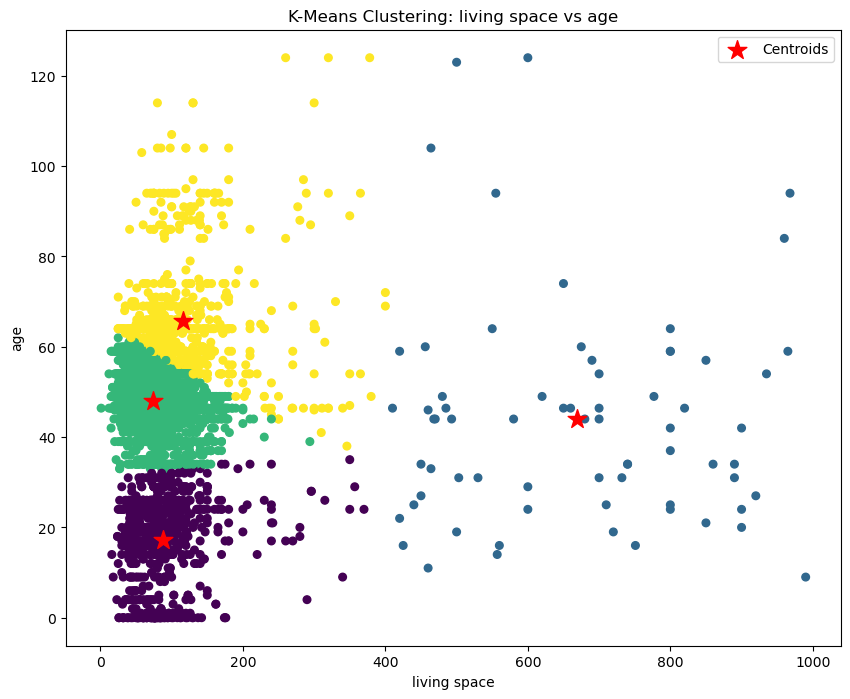

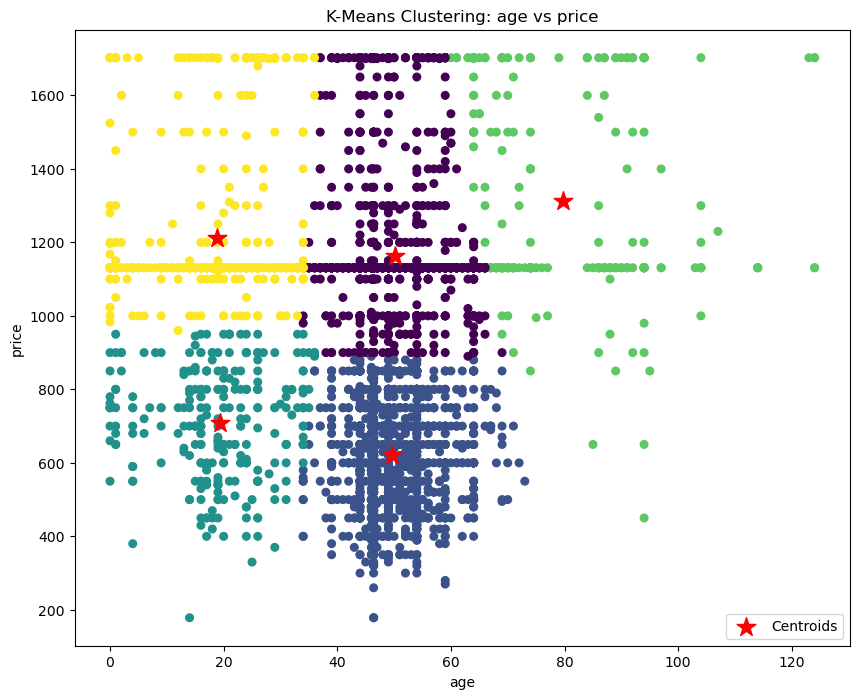

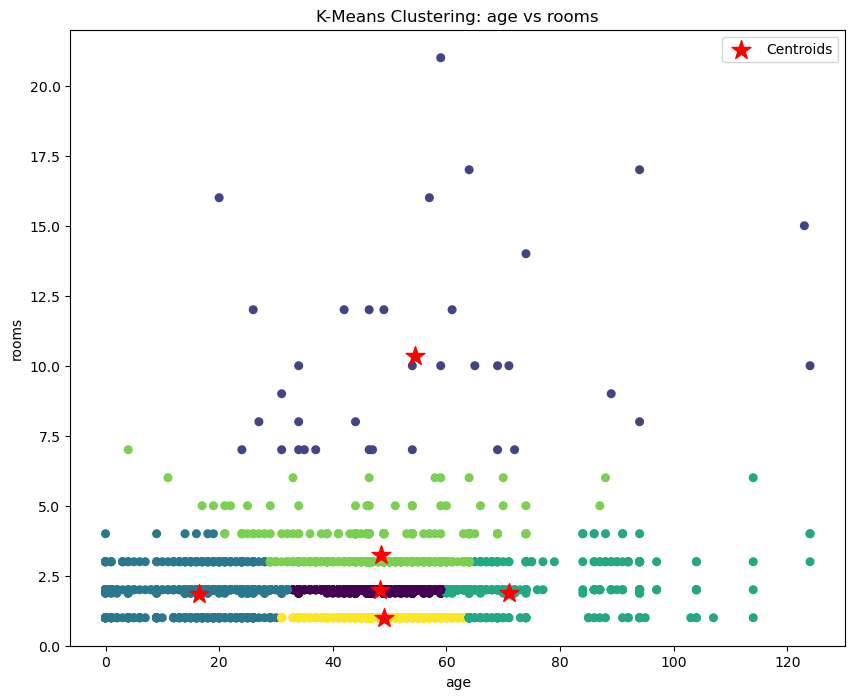

In [ ]:
# Perform clustering and visualization for each feature pair
for selected_columns, kmeans_params in [(fp[:2], fp[2]) for fp in feature_params]:
    # Select the relevant features
    X = data[list(selected_columns)].dropna()  # Remove missing values

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply the K-Means algorithm
    kmeans = KMeans(n_clusters=kmeans_params['n_clusters'], random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Retrieve cluster centers and labels
    centroids = kmeans.cluster_centers_

    # Add labels to the data
    X['Cluster'] = labels

    # Visualize the clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(
        centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0],  # Scale back to the original range
        centroids[:, 1] * scaler.scale_[1] + scaler.mean_[1],
        marker='*', s=200, c='red', label='Centroids'
    )

    # Chart title and labels
    plt.title(f"K-Means Clustering: {selected_columns[0]} vs {selected_columns[1]}")
    plt.xlabel(selected_columns[0])
    plt.ylabel(selected_columns[1])
    plt.legend()
    plt.show()


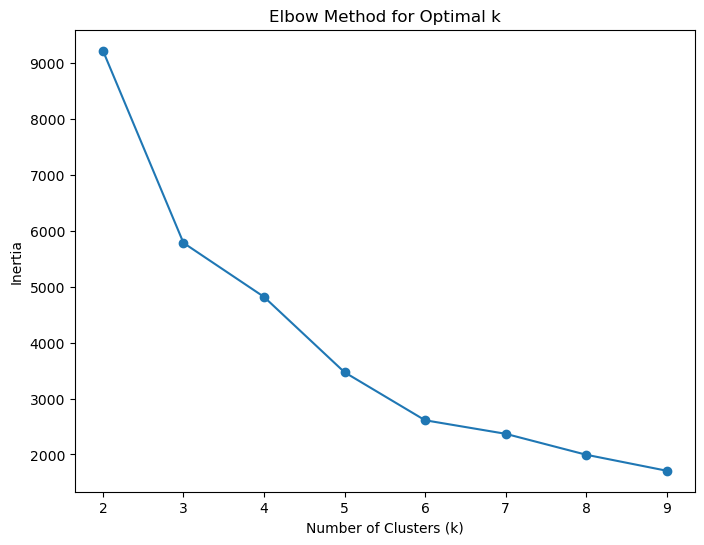

In [ ]:
# Define necessary parameters for the Elbow method
ks = range(2, 10)
inertias = []

# Train the K-Means model for different k values
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use the scaled data
    inertias.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


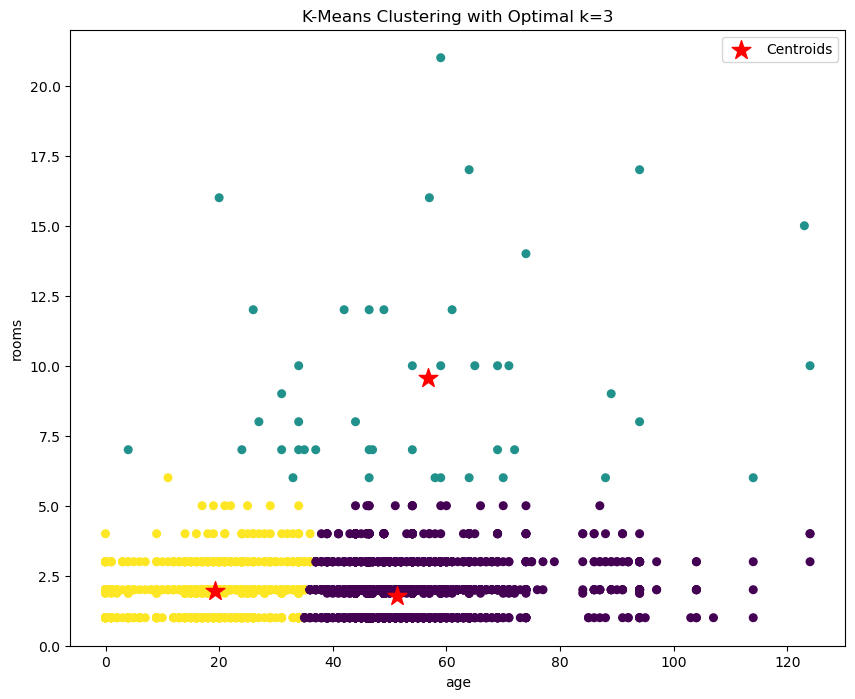

In [ ]:
# Decide on the optimal number of clusters (e.g., 3 based on the Elbow method)
optimal_k = 3

# Apply the K-Means algorithm
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_scaled)

# Retrieve cluster centers and labels
centroids_optimal = kmeans_optimal.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_optimal, cmap='viridis', s=30)
plt.scatter(
    centroids_optimal[:, 0] * scaler.scale_[0] + scaler.mean_[0],
    centroids_optimal[:, 1] * scaler.scale_[1] + scaler.mean_[1],
    marker='*', s=200, c='red', label='Centroids'
)
plt.title(f"K-Means Clustering with Optimal k={optimal_k}")
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.legend()
plt.show()


In [ ]:
# Add cluster labels to the DataFrame
X['Cluster'] = labels_optimal

# Summary statistics for each cluster
summary = X.groupby('Cluster').mean()
print(summary)


               age     rooms
Cluster                     
0        51.389607  1.787346
1        56.732020  9.568182
2        19.228031  1.954161


## **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('xe_property_listings_cleaned.csv')

In [ ]:
# Add new features
df['rooms_bathrooms'] = df['rooms'] + df['bathrooms']  # Sum of rooms and bathrooms
df['room_density'] = df['living space'] / df['rooms']  # Living space per room
df['bathroom_density'] = df['living space'] / df['bathrooms']  # Living space per bathroom
df['price_to_living_space_ratio'] = df['price'] / df['living space']  # Price to living space ratio
df['rooms_to_living_space_ratio'] = df['rooms'] / df['living space']  # Rooms to living space ratio
df['bathrooms_to_living_space_ratio'] = df['bathrooms'] / df['living space']  # Bathrooms to living space ratio
df['price_per_room'] = df['price'] / df['rooms']  # Price per room
df['price_per_bathroom'] = df['price'] / df['bathrooms']  # Price per bathroom
df['rooms_to_bathrooms_ratio'] = df['rooms'] / df['bathrooms']  # Ratio of rooms to bathrooms
df['bathrooms_to_rooms_ratio'] = df['bathrooms'] / df['rooms']  # Ratio of bathrooms to rooms
df['living_space_to_rooms_ratio'] = df['living space'] / df['rooms']  # Ratio of living space to rooms

In [ ]:
# Define independent and dependent variables
X = df[['living space', 'age', 'level', 'price_per_sqm', 'rooms_bathrooms', 'room_density', 'bathroom_density', 'price_to_living_space_ratio', 'rooms_to_living_space_ratio', 'bathrooms_to_living_space_ratio', 'price_per_room', 'price_per_bathroom', 'rooms_to_bathrooms_ratio', 'bathrooms_to_rooms_ratio', 'living_space_to_rooms_ratio']]
y = df['price']

In [ ]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error Test: {error_test} (train: {error_train})')  # MSE for test and train
print(f'Mean Error: {error_test**(1/2)} (train: {error_train**(1/2)})')  # Root Mean Square Error for test and train
print(f'Min: {y.min()} Max: {y.max()} Price Span: {y.max() - y.min()}')  # min, max, and price span
print(f'Error Relative To Span: {100*error_test**(1/2) / (y.max() - y.min())}% (train: {100*error_train**(1/2) / (y.max() - y.min())}%)')  # Error relative to price span

r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print(f'R-squared train: {r_squared_train}')  # R-squared for train
print(f'R-squared test: {r_squared_test}')  # R-squared for test

Mean Squared Error Test: 13894.037404019062 (train: 17376.575263809187)
Mean Error: 117.87297147361248 (train: 131.82023844542684)
Min: 178.50946372239753 Max: 1702.4842271293371 Price Span: 1523.9747634069395
Error Relative To Span: 7.734575027351516% (train: 8.649765180542397%)
R-squared train: 0.8122170964041984
R-squared test: 0.8516748323461225


In [ ]:
#(Coefficients and intercept)
df_coef = pd.DataFrame(np.array([model.coef_]), columns=['living space', 'age', 'level', 'price_per_sqm', 'rooms_bathrooms', 'room_density', 'bathroom_density', 'price_to_living_space_ratio', 'rooms_to_living_space_ratio', 'bathrooms_to_living_space_ratio', 'price_per_room', 'price_per_bathroom', 'rooms_to_bathrooms_ratio', 'bathrooms_to_rooms_ratio', 'living_space_to_rooms_ratio'])
df_coef['intercept'] = model.intercept_
display(df_coef)

living space       age      level  price_per_sqm  rooms_bathrooms  \
0      98.99774 -1.066507  12.272538      17.970952       150.016072   

   room_density  bathroom_density  price_to_living_space_ratio  \
0     -1.642503        -54.979241                    35.928499   

   rooms_to_living_space_ratio  bathrooms_to_living_space_ratio  \
0                    18.240482                      -349.217469   

   price_per_room  price_per_bathroom  rooms_to_bathrooms_ratio  \
0      -39.017136          293.789712                -68.138222   

   bathrooms_to_rooms_ratio  living_space_to_rooms_ratio    intercept  
0                245.025499                    -1.642503  1001.832091

In [ ]:
# Example prediction
i = int(np.random.rand() * len(y_test))
X_inv = scaler.inverse_transform([X_test[i]])[0]
df_pred = pd.DataFrame([X_inv], columns=['living space', 'age', 'level', 'price_per_sqm', 'rooms_bathrooms', 'room_density', 'bathroom_density', 'price_to_living_space_ratio', 'rooms_to_living_space_ratio', 'bathrooms_to_living_space_ratio', 'price_per_room', 'price_per_bathroom',  'rooms_to_bathrooms_ratio', 'bathrooms_to_rooms_ratio', 'living_space_to_rooms_ratio'])
df_pred['Price'] = y_test.iloc[i]
df_pred['Prediction'] = model.predict(X_test[i].reshape(1, -1))[0]
display(df_pred)

living space   age  level  price_per_sqm  rooms_bathrooms  room_density  \
0          48.0  61.0    2.0           25.0              2.0          48.0   

   bathroom_density  price_to_living_space_ratio  rooms_to_living_space_ratio  \
0              48.0                         25.0                     0.020833   

   bathrooms_to_living_space_ratio  price_per_room  price_per_bathroom  \
0                         0.020833          1200.0              1200.0   

   rooms_to_bathrooms_ratio  bathrooms_to_rooms_ratio  \
0                       1.0                       1.0   

   living_space_to_rooms_ratio   Price   Prediction  
0                         48.0  1200.0  1250.433154

## **Naive Bayes-Klassifikatoren**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# Load the cleaned data
df_clean = pd.read_csv('xe_property_listings_cleaned.csv')

# Display the first few rows
print(df_clean.head())

# Check data types
print(df_clean.dtypes)

                                                 url        price  \
0  https://www.xe.gr/en/property/d/property-to-re...   480.000000   
1  https://www.xe.gr/en/property/d/property-to-re...   600.000000   
2  https://www.xe.gr/en/property/d/property-to-re...   850.000000   
3  https://www.xe.gr/en/property/d/property-to-re...   800.000000   
4  https://www.xe.gr/en/property/d/property-to-re...  1702.484227   

   price_per_sqm  level  bathrooms                  address       type  \
0             12    4.0        1.0  Athens (Attica Square)   Apartment   
1             11    1.0        1.0    Athens (Ano Kipseli)   Apartment   
2              9    2.0        1.0       Athens (Polygono)   Apartment   
3              7    1.0        1.0  Athens (Agios Ioannis)   Apartment   
4             18    4.0        1.0       Athens (Kolonaki)   Apartment   

   living space  rooms        age  
0          39.0    1.0  24.000000  
1          53.0    2.0  46.402963  
2          97.0    4.0  41.00000

In [ ]:
# Select features and target variable for classification
features = ['price', 'price_per_sqm', 'level', 'rooms', 'bathrooms', 'age', 'living space']
target = 'type'

In [ ]:
# Split the data into training and testing sets
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_scaled)

Model performance is evaluated using the following metrics:
- **Accuracy Score**: Indicates the proportion of correct classifications made by the model.
- **Confusion Matrix**: Shows the relationship between actual and predicted classifications.
- **Classification Report**: Includes metrics such as precision, recall, F1-score, and support for each class.

In [ ]:
# Evaluate the model performance using accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9212050984936269
Confusion Matrix:
[[1555    2   14   52]
 [   2    4    6    0]
 [  20    4   13    4]
 [  25    1    6   18]]
Classification Report:
                precision    recall  f1-score   support

     Apartment       0.97      0.96      0.96      1623
      Building       0.36      0.33      0.35        12
Detached House       0.33      0.32      0.33        41
    Maisonette       0.24      0.36      0.29        50

      accuracy                           0.92      1726
     macro avg       0.48      0.49      0.48      1726
  weighted avg       0.93      0.92      0.93      1726



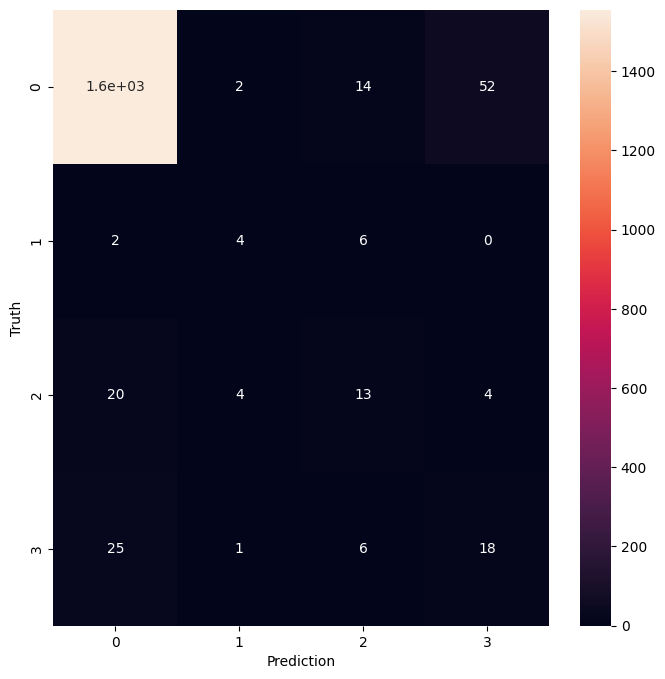

In [ ]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

Model parameters are fine-tuned using **GridSearchCV**. This method uses cross-validation to find the best-performing parameters within a specified range of hyperparameters.

In [ ]:
# Fine-tune the model parameters using GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'var_smoothing': 0.8111308307896871}
Best Score: 0.9513067417256152


The model is retrained using the best parameters obtained from GridSearchCV. This helps to optimize the model's performance.

In [ ]:
# Retrain the model with the best parameters
gnb_best = GaussianNB(var_smoothing=best_params['var_smoothing'])
gnb_best.fit(X_train_scaled, y_train)

# Make predictions on the test set with the fine-tuned model
y_pred_best = gnb_best.predict(X_test_scaled)

In [ ]:
# Evaluate the fine-tuned model performance using accuracy score, confusion matrix, and classification report
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy (Fine-Tuned): {accuracy_best}")
print("Confusion Matrix (Fine-Tuned):")
print(conf_matrix_best)
print("Classification Report (Fine-Tuned):")
print(class_report_best)

Accuracy (Fine-Tuned): 0.9449594438006953
Confusion Matrix (Fine-Tuned):
[[1619    2    2    0]
 [   3    3    6    0]
 [  30    3    7    1]
 [  42    0    6    2]]
Classification Report (Fine-Tuned):
                precision    recall  f1-score   support

     Apartment       0.96      1.00      0.98      1623
      Building       0.38      0.25      0.30        12
Detached House       0.33      0.17      0.23        41
    Maisonette       0.67      0.04      0.08        50

      accuracy                           0.94      1726
     macro avg       0.58      0.36      0.39      1726
  weighted avg       0.93      0.94      0.93      1726



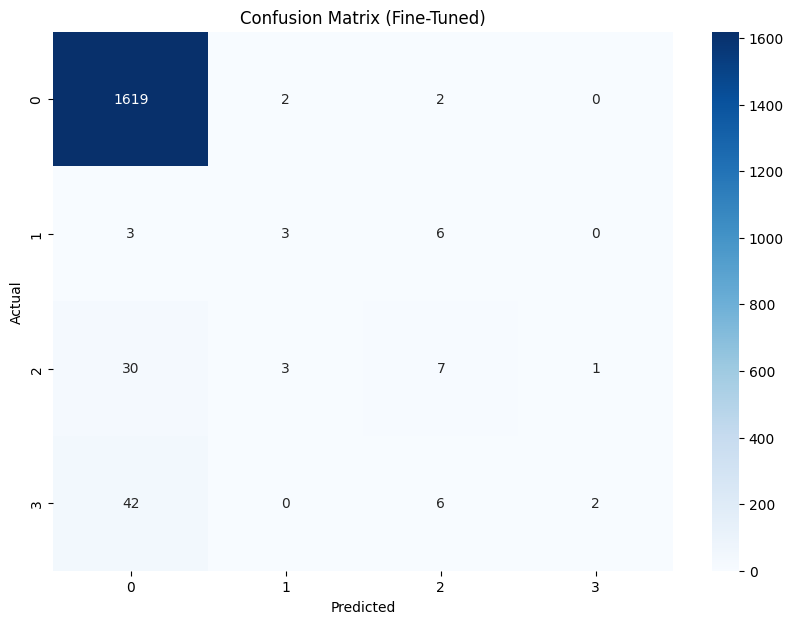

In [ ]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Fine-Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model performance is evaluated and visualized using the **ROC** *(Receiver Operating Characteristic)* curve and **AUC** *(Area Under the Curve)* metric. The ROC curve shows the relationship between the true positive rate (TPR) and false positive rate (FPR) at different threshold values. The AUC represents the area under the ROC curve and summarizes the overall performance of the model.

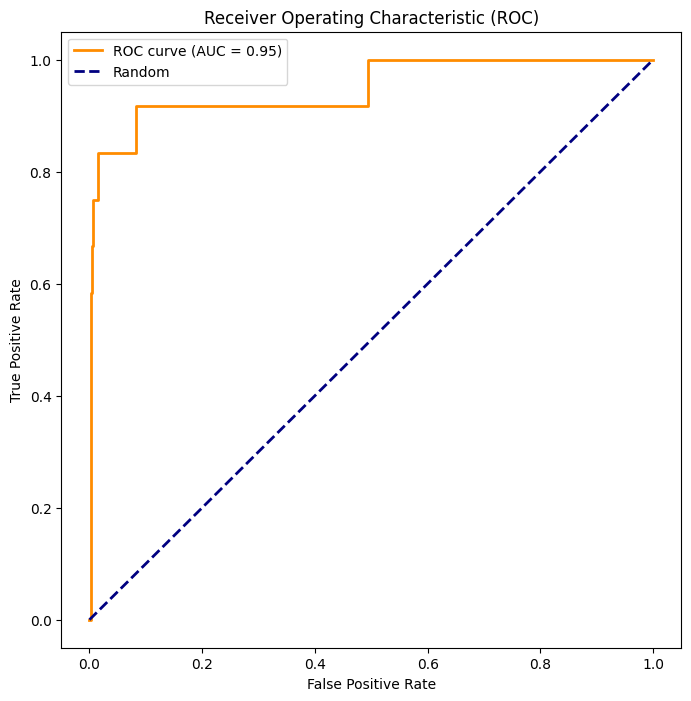

In [ ]:
# ROC Curve and AUC
probas = gnb_best.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label=gnb_best.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

## **K-Nächste-Nachbarn**

In [ ]:
import pandas as pd

Since KNN uses a distance measure, it is important to normalize the data, and only numerical values can be normalized, with StandardScaler for Gaussian-distributed data and MinMaxScaler for uniformly distributed data. That's why I used MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df_clean.select_dtypes(include=['number']).columns
df_numeric = df_clean[numeric_columns]

scaler = MinMaxScaler()
df_clean_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

print(df_clean_scaled.head())

      price  price_per_sqm  level  bathrooms  living space  rooms       age
0  0.197832       0.038596  0.500        0.0      0.038423   0.00  0.193548
1  0.276573       0.035088  0.125        0.0      0.052578   0.05  0.374217
2  0.440618       0.028070  0.250        0.0      0.097068   0.15  0.330645
3  0.407809       0.021053  0.125        0.0      0.117290   0.10  0.374217
4  1.000000       0.059649  0.500        0.0      0.124368   0.10  0.374217


In [ ]:
#Splitting the data into taining and test sets, using %80 for training and %20 for testing, with the "price" feature as the target.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean_scaled.drop(columns=['price']),df_clean_scaled['price'],test_size=0.2, random_state=42)

This code initializes a K-Nearest Neighbors (KNN) regressor with 3 neighbors and distance-based weighting. It then trains the model on the training data (X_train) with the target values (y_train)

In [ ]:
#The reason for not using KNeighborsClassifier is that my target variable, price, is continuous.
# Therefore, the most suitable choice is KNeighborsRegressor.
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3, weights='distance')

In [ ]:
#This code uses the trained K-Nearest Neighbors (KNN) regressor to predict the target values (y_pred) for the test data (X_test).
#It applies the learned model to estimate outcomes for unseen data points.
y_pred = knn.predict(X_test)

In [ ]:
#Evaluate model with MSE and R^2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.035693053205941315
R^2 Score: 0.11503593891412389


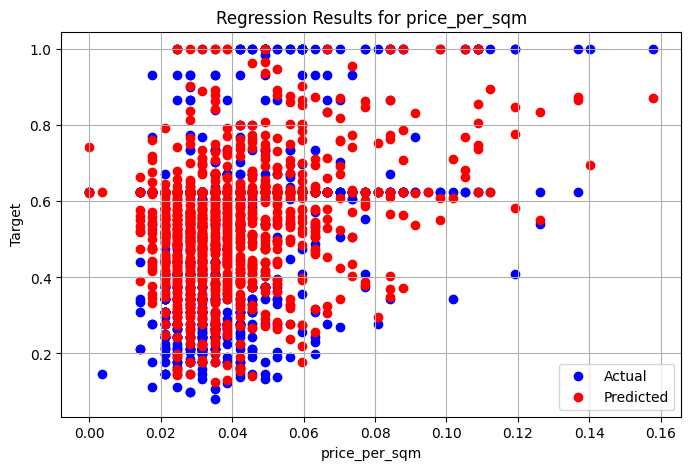

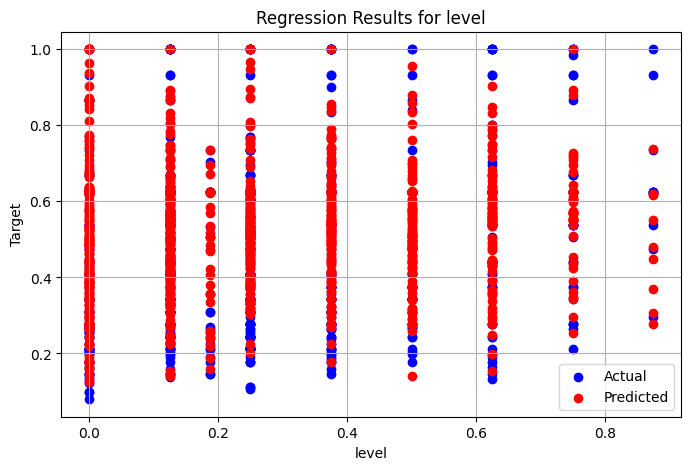

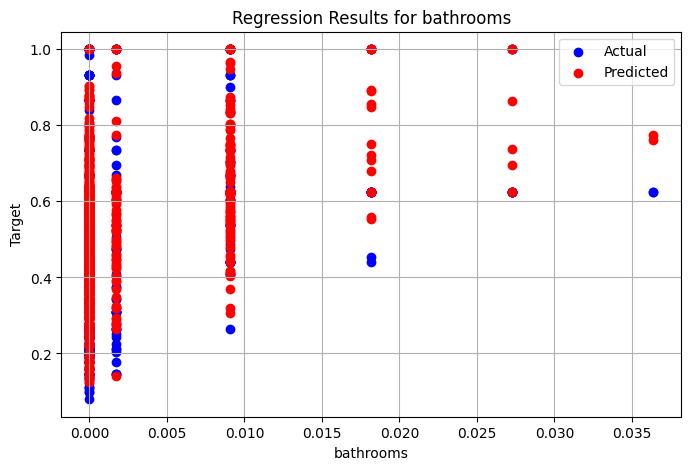

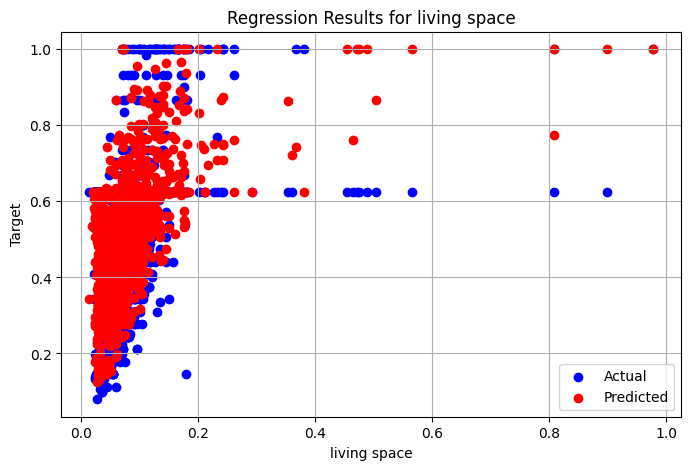

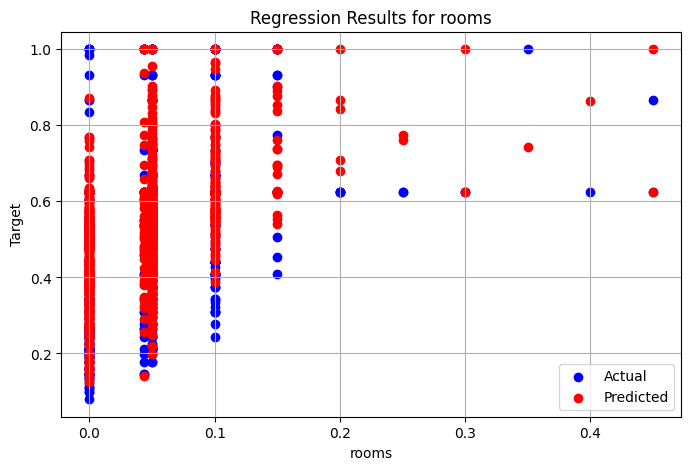

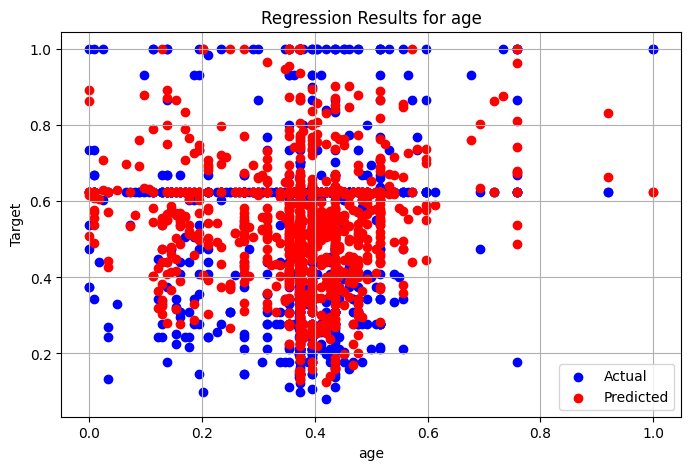

In [ ]:
#Visualize the Results
import matplotlib.pyplot as plt


feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'Feature {i+1}' for i in range(X_test.shape[1])]


for i, feature in enumerate(feature_names):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test.iloc[:, i] if hasattr(X_test, 'iloc') else X_test[:, i],
                y_test,
                color='blue',
                label='Actual')
    plt.scatter(X_test.iloc[:, i] if hasattr(X_test, 'iloc') else X_test[:, i],
                y_pred,
                color='red',
                label='Predicted')
    plt.title(f'Regression Results for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#Evaulate model using labels using Numpy and Pandas

import numpy as np
import pandas as pd

bins = [-2.60,-1.1, 0.5, 2.9, np.inf]
labels = ['very low','low','medium','high']

y_test_class = pd.cut(y_test, bins=bins, labels=labels)
y_pred_class = pd.cut(y_pred, bins=bins, labels=labels)


In [ ]:
#Finding "precision", "recall", "f1-score", "support" values.
from sklearn.metrics import classification_report

# Performance report
report = classification_report(y_test_class, y_pred_class)
print(report)

              precision    recall  f1-score   support

         low       0.50      0.56      0.52       394
      medium       0.75      0.71      0.73       757

    accuracy                           0.66      1151
   macro avg       0.63      0.63      0.63      1151
weighted avg       0.67      0.66      0.66      1151



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)

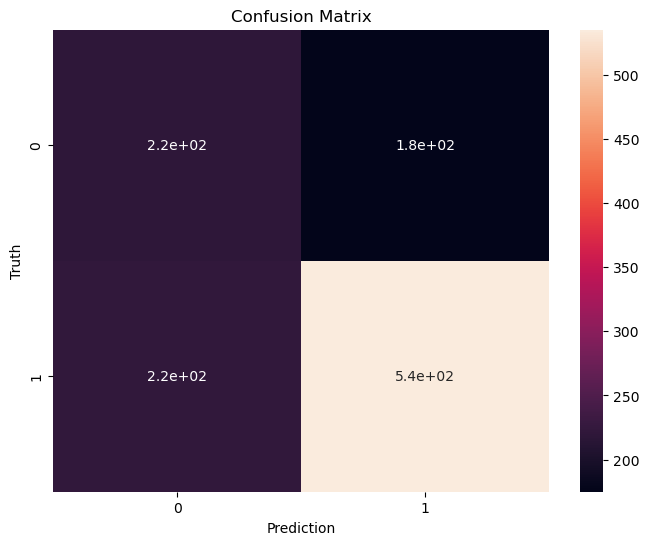

In [ ]:
#Confusion Matrix Display
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

Calculating "true positives", "false positives", "true negatives" and "false negatives" for each class from the confusion matrix

In [ ]:
n_classes = len(cm)
results = [None] * n_classes
for c in range(n_classes):
    r = {}
    r["TP"] = cm[c, c]                                      # True Positives
    r["FP"] = sum(cm[:, c]) - r["TP"]                       # False Positives
    r["FN"] = sum(cm[c, :]) - r["TP"]                       # False Negatives
    r["TN"] = sum(sum(cm)) - r["TP"] - r["FP"] - r["FN"]    # True Negatives
    results[c] = r
results

[{'TP': 219, 'FP': 222, 'FN': 175, 'TN': 535},
 {'TP': 535, 'FP': 175, 'FN': 222, 'TN': 219}]

In [ ]:
#Define "Accuracy", "Precision", "Recall", and "F1-Score"
accuracy = sum([r["TP"] for r in results])/ len(y_pred_class)
precision = [r["TP"]/(r["TP"]+r["FP"]) for r in results]
recall = [r["TP"] / (r["TP"] + r["FN"]) for r in results]
f1 = [2 * p * r / (p + r) for p, r in zip(precision, recall)]
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.6550825369244135
Precision: [0.4965986394557823, 0.7535211267605634]
Recall: [0.5558375634517766, 0.7067371202113606]
F1: [0.5245508982035928, 0.7293796864349013]


# Dimension Reduction
The K-NN algorithm relies on distance metrics to measure similarities between data points. Commonly, metrics like Euclidean or Manhattan distances are used.

In high-dimensional data (with many features):
- Distance measurements become ineffective: All data points may appear to have similar distances, a phenomenon known as the Curse of Dimensionality.
- Computational cost increases: The K-NN algorithm must compute distances between all data points, and as the number of dimensions increases, this process becomes significantly more expensive.

Curse of Dimensionality Example:

- If your data has 100 features, it is represented in a 100-dimensional space.
- In such high-dimensional space, distinguishing differences between data points becomes challenging, which can degrade the performance of K-NN.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumsum_explained_variance)

[0.66808134 0.86110553 0.96822358 0.98942313 0.9968415  1.        ]


In [ ]:
#This graph helps you understand interactively how many components explain the total variance during PCA (Principal Component Analysis).
#For example, from the graph, you can easily determine the number of components that explain 95% of the variance, which in this case is 3.
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, len(cumsum_explained_variance) + 1)),
                         y=cumsum_explained_variance,
                         mode='lines+markers',
                         line=dict(dash='dash'),
                         marker=dict(symbol='circle', size=8)))
fig.update_layout(title='Explained Variance to Number of Components',
                  xaxis_title='Number of Components',
                  yaxis_title='Cumulative Explained Variance Ratio')
fig.show()

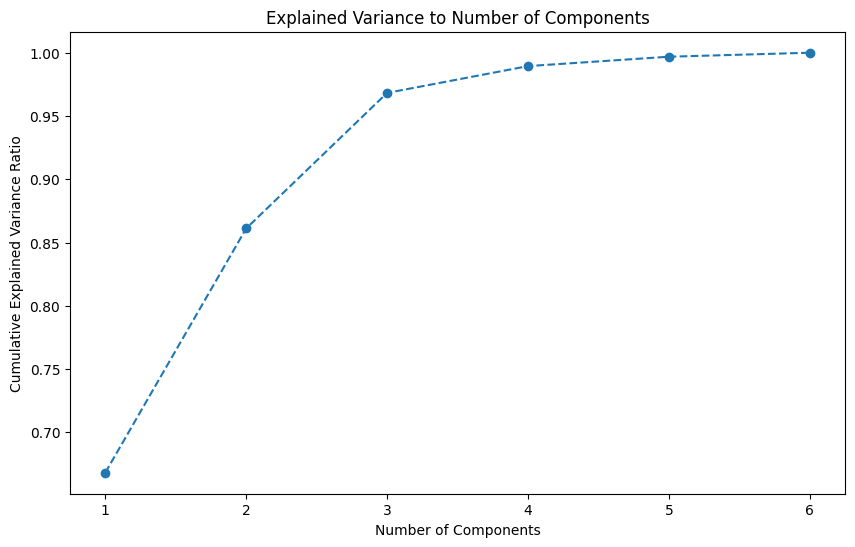

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsum_explained_variance ) + 1), cumsum_explained_variance , marker='o', linestyle='--')
plt.title('Explained Variance to Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

How many dimension can the problem be "meaningfully" reduced.

In [ ]:
#We know that it is 3 by inferring from the graphs visualized above.
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)
X_test_pca_3 = pca_3.transform(X_test)

How far are two points from each other in full dimensionality and how far in reduced dimensionality?

In [ ]:
import numpy as np

num_rows = X_train.shape[0]

#Random points are selected.
idx_1, idx_2 = np.random.choice(num_rows, size=2, replace=False)

print(f"Index 1: {idx_1}, Index 2: {idx_2}")

#Calculating the distance in full dimensionality and in reduced dimensionality.
dist_full = np.sqrt(np.sum((X_train.values[idx_1] - X_train.values[idx_2])**2))
dist_pca_3 = np.sqrt(np.sum((X_train_pca_3[idx_1] - X_train_pca_3[idx_2])**2))

print(f"Distance full dims: {dist_full}")
print(f"Distance3 dims: {dist_pca_3}")

Index 1: 2818, Index 2: 402
Distance full dims: 0.505613202007818
Distance3 dims: 0.5050957933868673


Data and Predictions visualizing.

In [ ]:
import plotly.express as px
def plotly_classification_plot(X_train, y_train, X_test, y_test, y_pred):
    pca_3 = PCA(n_components=3)
    X_train_pca_3 = pca_3.fit_transform(X_train)
    X_test_pca_3 = pca_3.transform(X_test)
    fig = px.scatter(x=X_train_pca_3[:, 0], y=X_train_pca_3[:, 1], color=y_train, title='Ground Truth')
    fig.add_scatter(x=X_test_pca_3[:, 0], y=X_test_pca_3[:, 1], mode='markers', marker=dict(color=y_test, symbol='x'), name='Test Data')
    fig.show()
    fig = px.scatter(x=X_train_pca_3[:, 0], y=X_train_pca_3[:, 1], color=y_train, title='Prediction')
    fig.add_scatter(x=X_test_pca_3[:, 0], y=X_test_pca_3[:, 1], mode='markers', marker=dict(color=y_pred, symbol='x'), name='Test Data')
    fig.show()
plotly_classification_plot(X_train, y_train, X_test, y_test, y_pred)

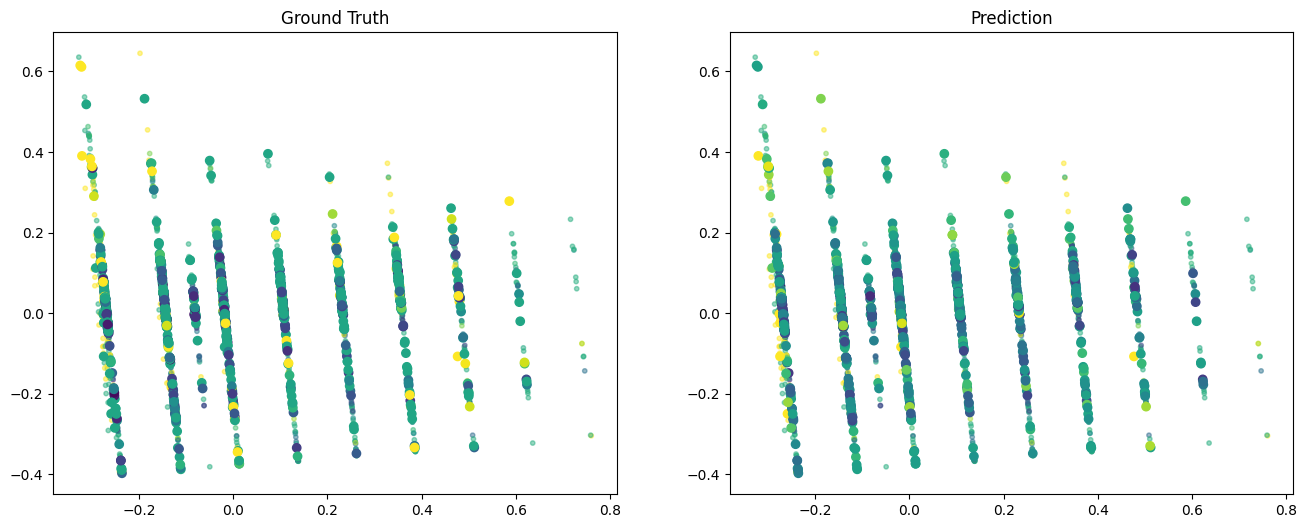

In [ ]:
#Defines a function matplotlib_classification_plot that visualizes the results of a classification task using Principal Component Analysis (PCA) for dimensionality reduction.
#It reduces the training and test datasets to 3 principal components and then plots the first two components for visualization.
def matplotlib_classification_plot(X_train, y_train, X_test, y_test, y_pred):
    pca_3 = PCA(n_components=3)
    X_train_pca_3 = pca_3.fit_transform(X_train)
    X_test_pca_3 = pca_3.transform(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].scatter(X_train_pca_3[:, 0], X_train_pca_3[:, 1], c=y_train, alpha=0.5, s=10)
    axes[1].scatter(X_train_pca_3[:, 0], X_train_pca_3[:, 1], c=y_train, alpha=0.5, s=10)
    axes[0].scatter(X_test_pca_3[:, 0], X_test_pca_3[:, 1], c=y_test)
    axes[1].scatter(X_test_pca_3[:, 0], X_test_pca_3[:, 1], c=y_pred)
    axes[0].set_title('Ground Truth')
    axes[1].set_title('Prediction')
    plt.show()
matplotlib_classification_plot(X_train, y_train, X_test, y_test, y_pred)

Fine-Tuning

In [ ]:
#Performs a grid search to optimize the hyperparameters of a pipeline consisting of PCA for
#dimensionality reduction and K-Nearest Neighbors (KNN) for regression.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'pca__n_components': range(2,7),
    'knn__n_neighbors': range(3,7,2)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
plotly_classification_plot(X_train, y_train, X_test, y_test, y_pred)

Best Parameters:  {'knn__n_neighbors': 5, 'pca__n_components': 5}


- Calculation of MSE and R2 after PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.decomposition import PCA


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                                            df_clean_scaled.drop(columns=['price']),
                                                            df_clean_scaled['price'],test_size=0.2,
                                                            random_state=42)

pca_5 = PCA(n_components=5)
X_train_pca_5 = pca_5.fit_transform(X_train_2)
X_test_pca_5 = pca_5.transform(X_test_2)

knn_2 = KNeighborsRegressor(n_neighbors=5)
knn_2.fit(X_train_pca_5, y_train_2)

y_pred_2 = knn_2.predict(X_test_pca_5)

mse = mean_squared_error(y_test_2, y_pred_2)
r2 = r2_score(y_test_2, y_pred_2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.032251583154236506
R² Score: 0.20036283139064526
